# **PREDICCION DE PRECIO DE VENTA DE CASAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## LECTURA DE LOS DATASETS

In [ ]:
dataset_train = pd.read_csv("dataset/train.csv")

In [ ]:
dataset_test = pd.read_csv("dataset/test.csv")

In [ ]:
display(dataset_train)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [ ]:
display(dataset_test)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

## EXPLORACION DEL DATASET DE ENTRENAMIENTO

In [ ]:
dataset_train.shape

(1460, 81)

In [ ]:
dataset_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Exploracion del dataset de prueba

In [ ]:
dataset_test.shape

(1459, 80)

In [ ]:
dataset_test.describe()

Id   MSSubClass     MSZoning  LotFrontage       LotArea  \
count  1459.000000  1459.000000  1459.000000  1232.000000   1459.000000   
mean   2190.000000    57.378341     2.302262    68.580357   9819.161069   
std     421.321334    42.746880     0.648784    22.376841   4955.517327   
min    1461.000000    20.000000     1.000000    21.000000   1470.000000   
25%    1825.500000    20.000000     2.000000    58.000000   7391.000000   
50%    2190.000000    50.000000     2.000000    67.000000   9399.000000   
75%    2554.500000    70.000000     2.000000    80.000000  11517.500000   
max    2919.000000   190.000000     6.000000   200.000000  56600.000000   

            Street        Alley     LotShape  LandContour    Utilities  ...  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000  ...   
mean      1.004112     1.121316     1.392049     1.171350     1.001371  ...   
std       0.064018     0.450215     0.557864     0.561183     0.037012  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
50%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
75%       1.000000     1.000000     2.000000     1.000000     1.000000  ...   
max       2.000000     3.000000     4.000000     4.000000     2.000000  ...   

       ScreenPorch     PoolArea       PoolQC        Fence  MiscFeature  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     17.064428     1.744345     1.002742     2.004112     1.069225   
std      56.609763    30.491646     0.064091     0.568959     0.368522   
min       0.000000     0.000000     1.000000     1.000000     1.000000   
25%       0.000000     0.000000     1.000000     2.000000     1.000000   
50%       0.000000     0.000000     1.000000     2.000000     1.000000   
75%       0.000000     0.000000     1.000000     2.000000     1.000000   
max     576.000000   800.000000     3.000000     5.000000     4.000000   

            MiscVal       MoSold       YrSold     SaleType  SaleCondition  
count   1459.000000  1459.000000  1459.000000  1459.000000    1459.000000  
mean      58.167923     6.104181  2007.769705     1.328307       1.318026  
std      630.806978     2.722432     1.301740     1.028984       0.809086  
min        0.000000     1.000000  2006.000000     1.000000       1.000000  
25%        0.000000     4.000000  2007.000000     1.000000       1.000000  
50%        0.000000     6.000000  2008.000000     1.000000       1.000000  
75%        0.000000     8.000000  2009.000000     1.000000       1.000000  
max    17000.000000    12.000000  2010.000000    10.000000       6.000000  

[8 rows x 80 columns]

In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   float64
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   float64
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Distribucion de la el precio de venta de las casas

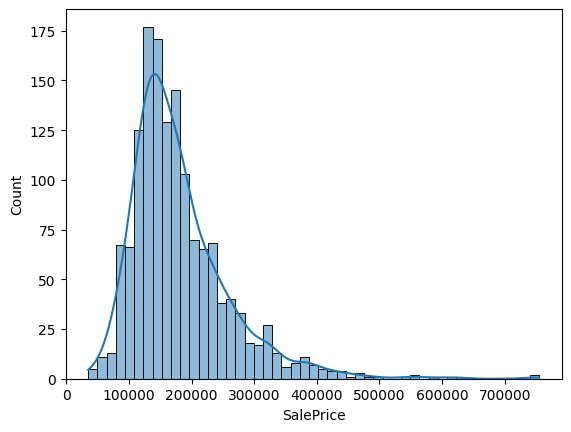

In [ ]:
sns.histplot(dataset_train['SalePrice'], kde=True)
plt.show()

## Coversion de las columnas categoricas a numericas

### Conversion dataset entrenamiento

In [ ]:
# Obtener las columnas categóricas
columnas_categoricas = dataset_train.select_dtypes(include='object').columns

# Crear un diccionario para mapear los valores únicos a números
mapeo_numerico = {}

# Recorrer las columnas categóricas y asignar un código numérico a cada valor único
for columna in columnas_categoricas:
    valores_unicos = dataset_train[columna].unique()
    mapeo_numerico[columna] = {valor: codigo + 1 for codigo, valor in enumerate(valores_unicos)}

# Aplicar el mapeo numérico al DataFrame
dataset_train.replace(mapeo_numerico, inplace=True)

In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dataset_train.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000  1201.000000    1460.000000   
mean    730.500000    56.897260     1.340411    70.049958   10516.828082   
std     421.610009    42.300571     0.798309    24.284752    9981.264932   
min       1.000000    20.000000     1.000000    21.000000    1300.000000   
25%     365.750000    20.000000     1.000000    59.000000    7553.500000   
50%     730.500000    50.000000     1.000000    69.000000    9478.500000   
75%    1095.250000    70.000000     1.000000    80.000000   11601.500000   
max    1460.000000   190.000000     5.000000   313.000000  215245.000000   

            Street        Alley     LotShape  LandContour    Utilities  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      1.004110     1.090411     1.408219     1.195205     1.000685  ...   
std       0.063996     0.372151     0.582296     0.642010     0.026171  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
50%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
75%       1.000000     1.000000     2.000000     1.000000     1.000000  ...   
max       2.000000     3.000000     4.000000     4.000000     2.000000  ...   

          PoolArea       PoolQC        Fence  MiscFeature       MiscVal  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      2.758904     1.010274     1.332877     1.043151     43.489041   
std      40.177307     0.158916     0.793316     0.245984    496.123024   
min       0.000000     1.000000     1.000000     1.000000      0.000000   
25%       0.000000     1.000000     1.000000     1.000000      0.000000   
50%       0.000000     1.000000     1.000000     1.000000      0.000000   
75%       0.000000     1.000000     1.000000     1.000000      0.000000   
max     738.000000     4.000000     5.000000     5.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1460.000000  1460.000000  1460.000000     1460.00000    1460.000000  
mean      6.321918  2007.815753     1.234932        1.35000  180921.195890  
std       2.703626     1.328095     0.804553        0.88787   79442.502883  
min       1.000000  2006.000000     1.000000        1.00000   34900.000000  
25%       5.000000  2007.000000     1.000000        1.00000  129975.000000  
50%       6.000000  2008.000000     1.000000        1.00000  163000.000000  
75%       8.000000  2009.000000     1.000000        1.00000  214000.000000  
max      12.000000  2010.000000     9.000000        6.00000  755000.000000  

[8 rows x 81 columns]

### Conversion dataset de prueba

In [ ]:
# Obtener las columnas categóricas
columnas_categoricas = dataset_test.select_dtypes(include='object').columns

# Crear un diccionario para mapear los valores únicos a números
mapeo_numerico = {}

# Recorrer las columnas categóricas y asignar un código numérico a cada valor único
for columna in columnas_categoricas:
    valores_unicos = dataset_test[columna].unique()
    mapeo_numerico[columna] = {valor: codigo + 1 for codigo, valor in enumerate(valores_unicos)}

# Aplicar el mapeo numérico al DataFrame
dataset_test.replace(mapeo_numerico, inplace=True)

## Calculo del umbral de correlacion de las variables predictoras con la variables a predecir

<Axes: >

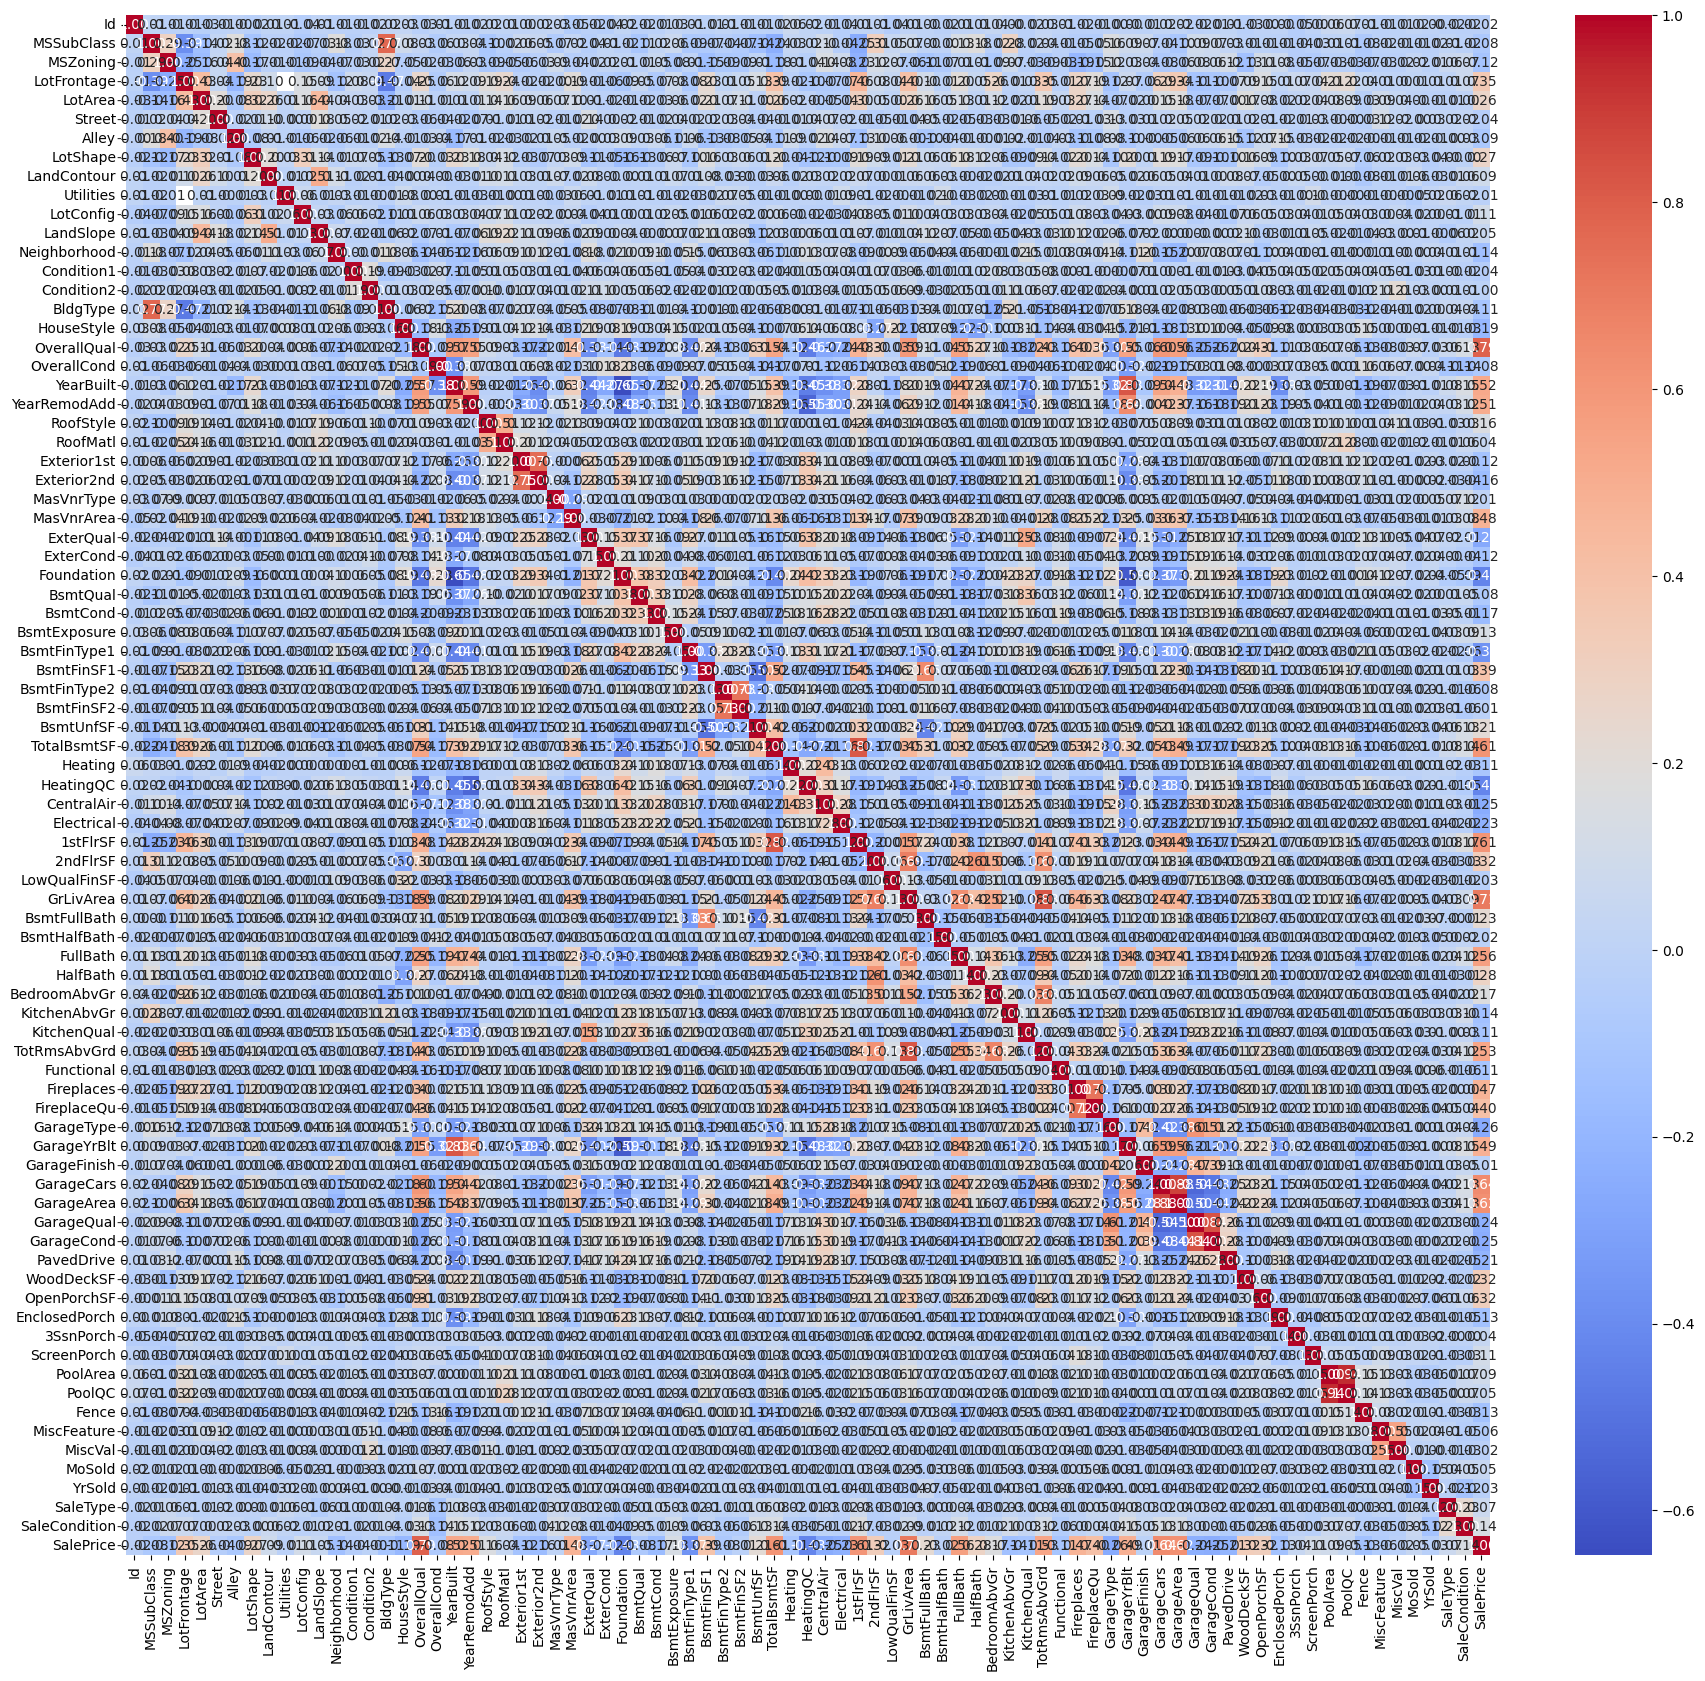

In [ ]:
fig, ax = plt.subplots(figsize=(22, 20))

corr_matrix = dataset_train.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)



In [ ]:
listado_correlacion = corr_matrix['SalePrice'].sort_values(ascending=False)

# Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el listado de correlación completo
print(listado_correlacion)

# Restaurar la configuración de Pandas a su valor predeterminado
pd.reset_option('display.max_rows')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
FireplaceQu      0.402854
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotShape         0.267759
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
RoofStyle        0.159332
SaleCondition    0.142503
BsmtExposure     0.132027
ScreenPorch      0.111447
LotConfig        0.109106
PoolArea         0.092404
LandContour      0.092009
SaleType         0.072896
PoolQC           0.051364
LandSlope        0.051152
MoSold           0.046432
3SsnPorch        0.044584
RoofMatl    

## Exploracion visual de la correlacion

<ipython-input-6-2f9ad1f172d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['OverallQual'], y=dataset_train['SalePrice'], palette="coolwarm")


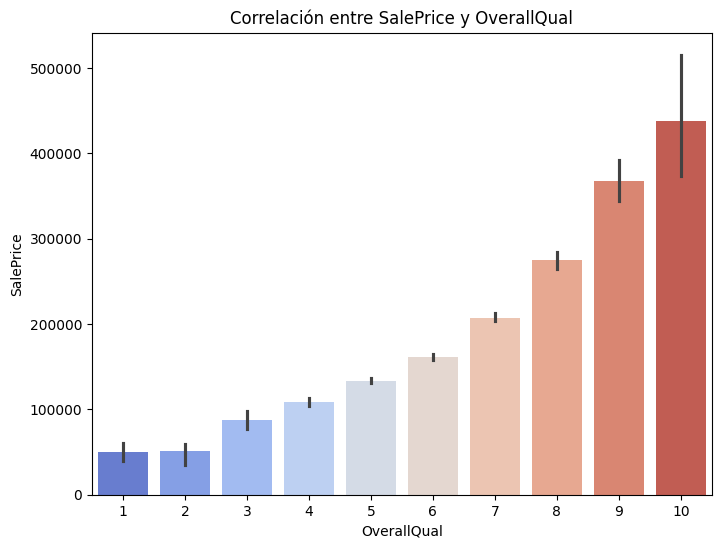

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['OverallQual'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'OverallQual'}")

plt.show()

<ipython-input-7-4f4b85443117>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['GrLivArea'], y=dataset_train['SalePrice'], palette="coolwarm")


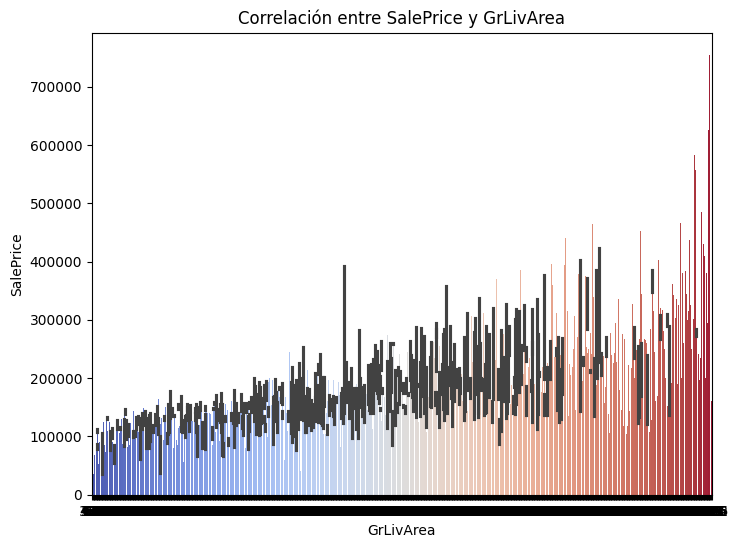

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['GrLivArea'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'GrLivArea'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="GrLivArea", ascending=True)

print(dataset_ordenado[["GrLivArea"]])

      GrLivArea
638         407
1325        492
1411        498
140         540
453         572
...         ...
1168       3390
1222       3500
1362       3672
728        3820
1089       5095

[1459 rows x 1 columns]


<ipython-input-9-e89ab9da8a26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['GarageCars'], y=dataset_train['SalePrice'], palette="coolwarm")


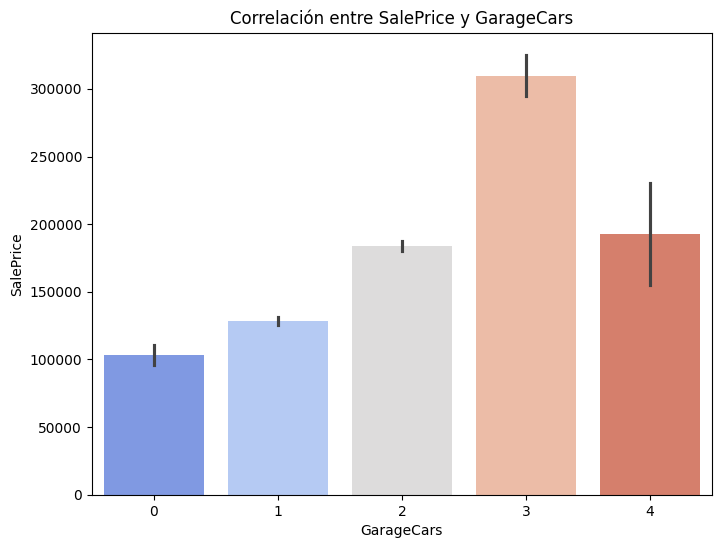

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['GarageCars'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'GarageCars'}")

plt.show()

<ipython-input-11-dee1eea5d8f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['GarageArea'], y=dataset_train['SalePrice'], palette="coolwarm")


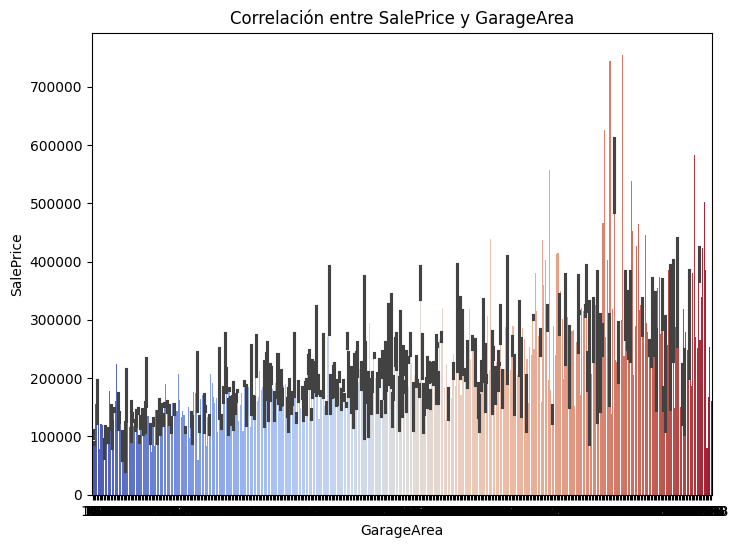

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['GarageArea'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'GarageArea'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="GarageArea", ascending=True)

print(dataset_ordenado[["GarageArea"]])

      GarageArea
1428         0.0
1115         0.0
893          0.0
154          0.0
71           0.0
...          ...
420       1231.0
495       1314.0
701       1348.0
611       1488.0
1116         NaN

[1459 rows x 1 columns]


<ipython-input-13-e8748134130e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['TotalBsmtSF'], y=dataset_train['SalePrice'], palette="coolwarm")


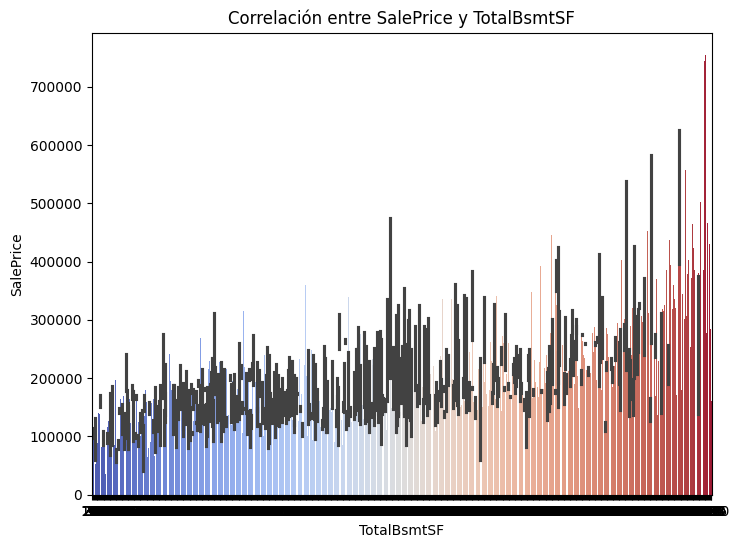

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['TotalBsmtSF'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'TotalBsmtSF'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="TotalBsmtSF", ascending=True)

print(dataset_ordenado[["TotalBsmtSF"]])

      TotalBsmtSF
729           0.0
1306          0.0
125           0.0
354           0.0
608           0.0
...           ...
203        2630.0
803        2660.0
19         2846.0
1089       5095.0
660           NaN

[1459 rows x 1 columns]


<ipython-input-15-d96b66573269>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['1stFlrSF'], y=dataset_train['SalePrice'], palette="coolwarm")


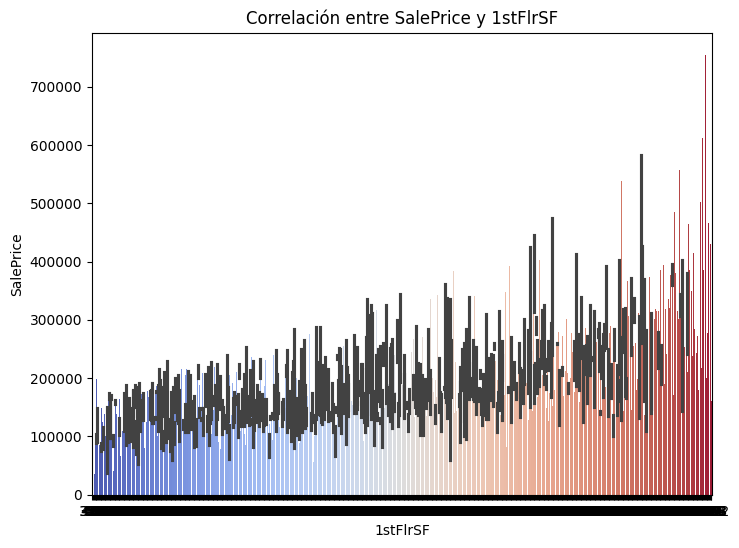

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['1stFlrSF'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'1stFlrSF'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="GrLivArea", ascending=True)

print(dataset_ordenado[["1stFlrSF"]])

      1stFlrSF
638        407
1325       492
1411       498
140        540
453        572
...        ...
1168      1528
1222      1933
1362      1836
728       3820
1089      5095

[1459 rows x 1 columns]


<ipython-input-17-2eb93b53f71e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['FullBath'], y=dataset_train['SalePrice'], palette="coolwarm")


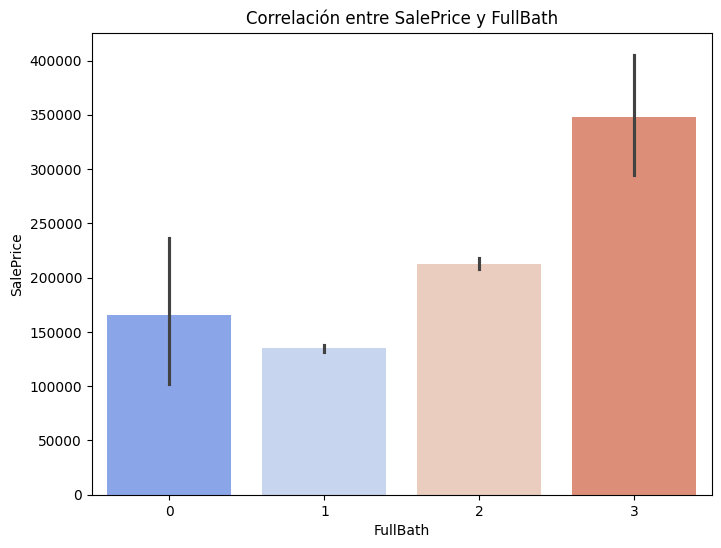

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['FullBath'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'FullBath'}")

plt.show()

<ipython-input-18-1c4f17f5dfaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['TotRmsAbvGrd'], y=dataset_train['SalePrice'], palette="coolwarm")


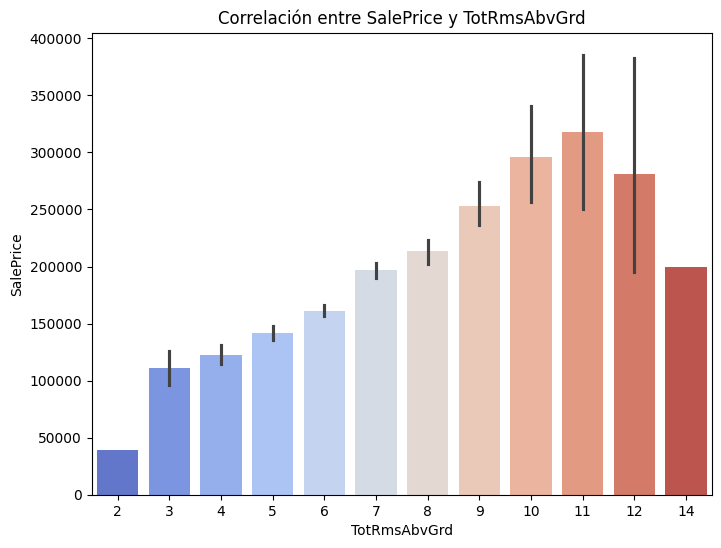

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['TotRmsAbvGrd'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'TotRmsAbvGrd'}")

plt.show()

<ipython-input-19-1c4f17f5dfaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['TotRmsAbvGrd'], y=dataset_train['SalePrice'], palette="coolwarm")


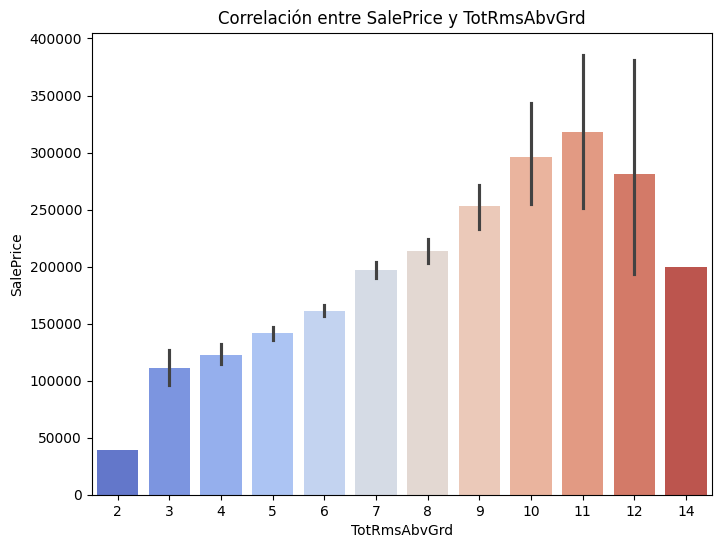

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['TotRmsAbvGrd'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'TotRmsAbvGrd'}")

plt.show()

<ipython-input-20-c447062253c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['YearBuilt'], y=dataset_train['SalePrice'], palette="coolwarm")


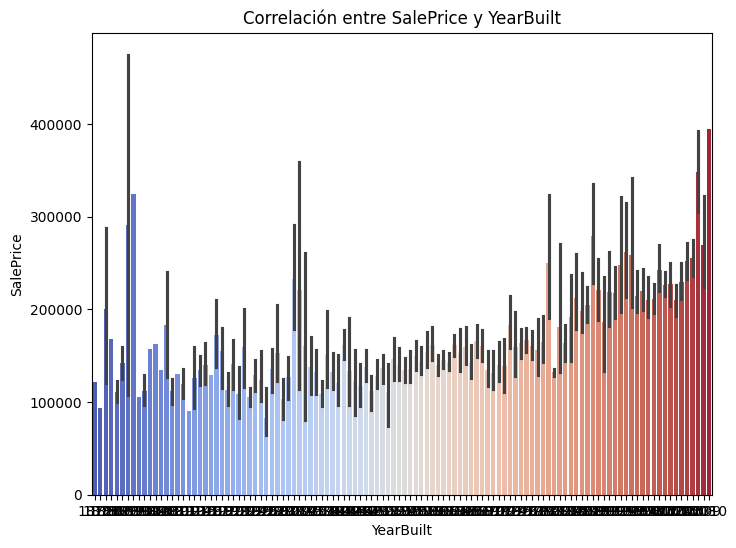

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['YearBuilt'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'YearBuilt'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="YearBuilt", ascending=True)

print(dataset_ordenado[["YearBuilt"]])

     YearBuilt
991       1879
396       1880
962       1890
636       1890
78        1890
..         ...
201       2009
112       2009
148       2009
116       2010
42        2010

[1459 rows x 1 columns]


<ipython-input-22-ac67ef339deb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['YearRemodAdd'], y=dataset_train['SalePrice'], palette="coolwarm")


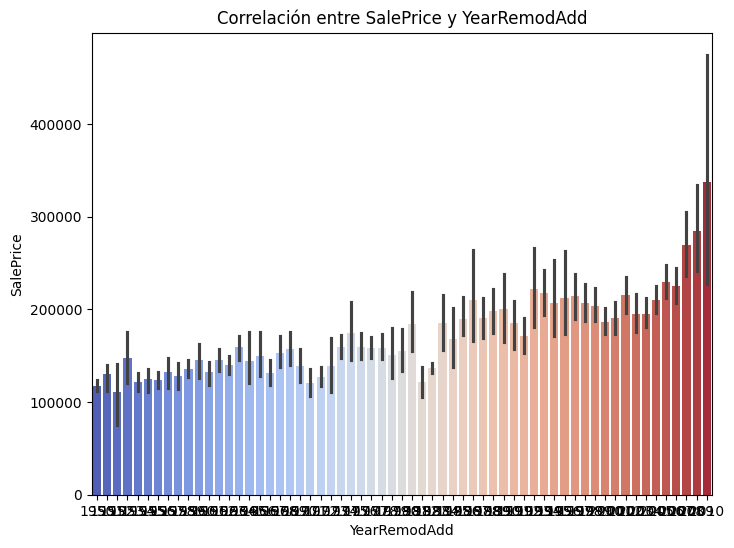

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['YearRemodAdd'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'YearRemodAdd'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="YearRemodAdd", ascending=True)

print(dataset_ordenado[["YearRemodAdd"]])

      YearRemodAdd
1042          1950
359           1950
1034          1950
1030          1950
140           1950
...            ...
42            2010
16            2010
15            2010
112           2010
28            2010

[1459 rows x 1 columns]


<ipython-input-24-7175a8fdeea2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['GarageYrBlt'], y=dataset_train['SalePrice'], palette="coolwarm")


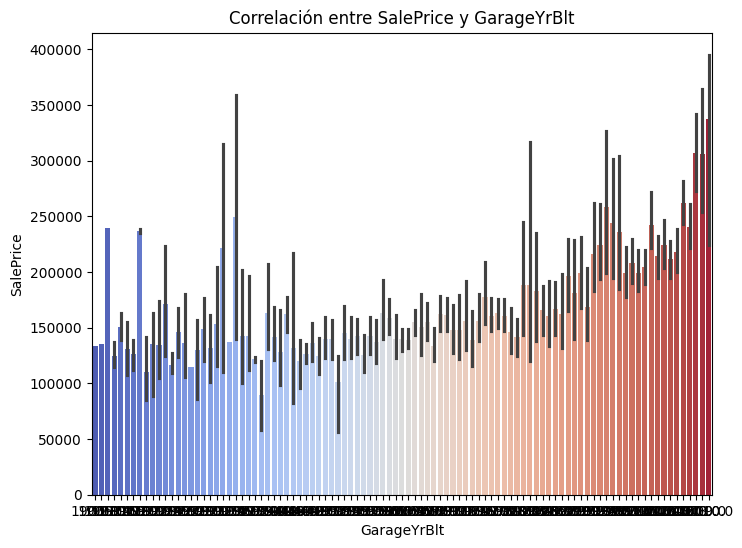

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['GarageYrBlt'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'GarageYrBlt'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="GarageYrBlt", ascending=True)

print(dataset_ordenado[["GarageYrBlt"]])

      GarageYrBlt
757        1895.0
142        1896.0
1312       1900.0
1297       1900.0
396        1900.0
...           ...
1433          NaN
1449          NaN
1453          NaN
1454          NaN
1457          NaN

[1459 rows x 1 columns]


<ipython-input-26-fd4e2960f63c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['MasVnrArea'], y=dataset_train['SalePrice'], palette="coolwarm")


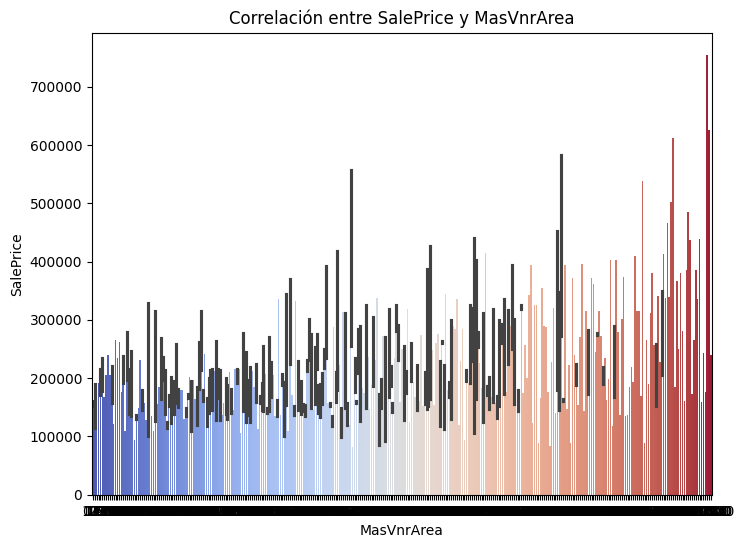

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['MasVnrArea'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'MasVnrArea'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="MasVnrArea", ascending=True)

print(dataset_ordenado[["MasVnrArea"]])

      MasVnrArea
0            0.0
843          0.0
852          0.0
854          0.0
855          0.0
...          ...
908          NaN
1132         NaN
1197         NaN
1226         NaN
1402         NaN

[1459 rows x 1 columns]


<ipython-input-28-29b5ebbb75b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['Fireplaces'], y=dataset_train['SalePrice'], palette="coolwarm")


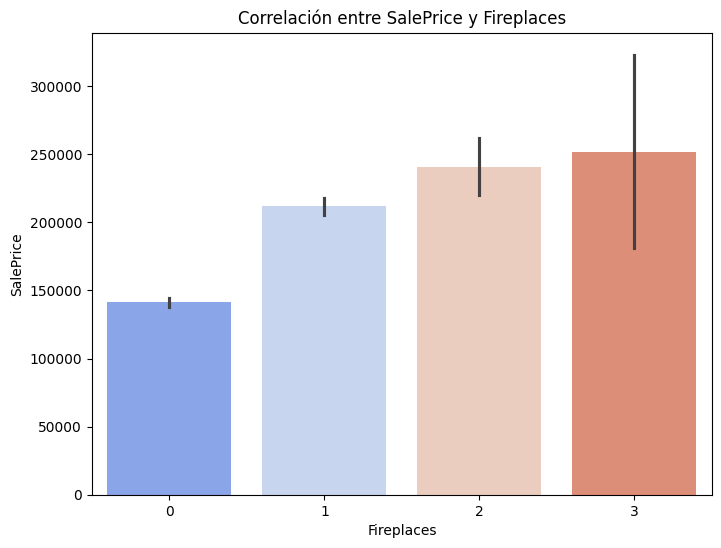

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['Fireplaces'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'Fireplaces'}")

plt.show()

<ipython-input-29-a4207ac93e85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['BsmtFinSF1'], y=dataset_train['SalePrice'], palette="coolwarm")


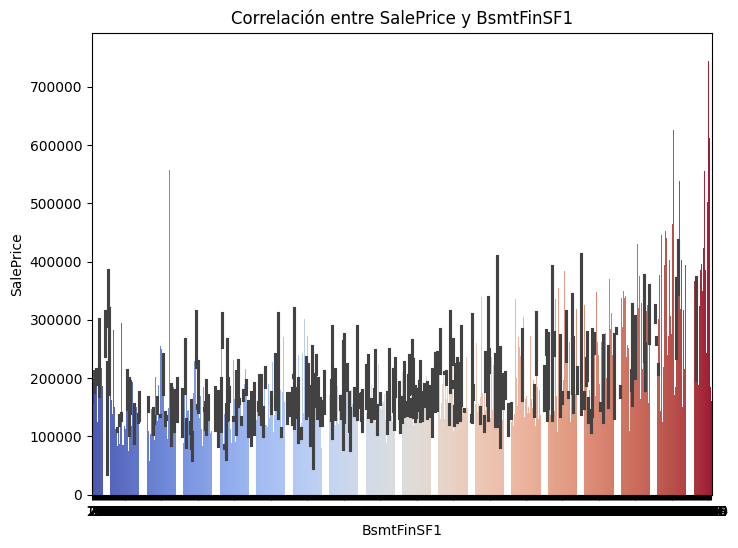

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['BsmtFinSF1'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'BsmtFinSF1'}")

plt.show()

In [ ]:
dataset_ordenado = dataset_test.sort_values(by="BsmtFinSF1", ascending=True)

print(dataset_ordenado[["BsmtFinSF1"]])

      BsmtFinSF1
729          0.0
1117         0.0
449          0.0
1115         0.0
452          0.0
...          ...
245       2158.0
514       2257.0
203       2288.0
1089      4010.0
660          NaN

[1459 rows x 1 columns]


<ipython-input-8-210927e3d7b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['LotFrontage'], y=dataset_train['SalePrice'], palette="coolwarm")


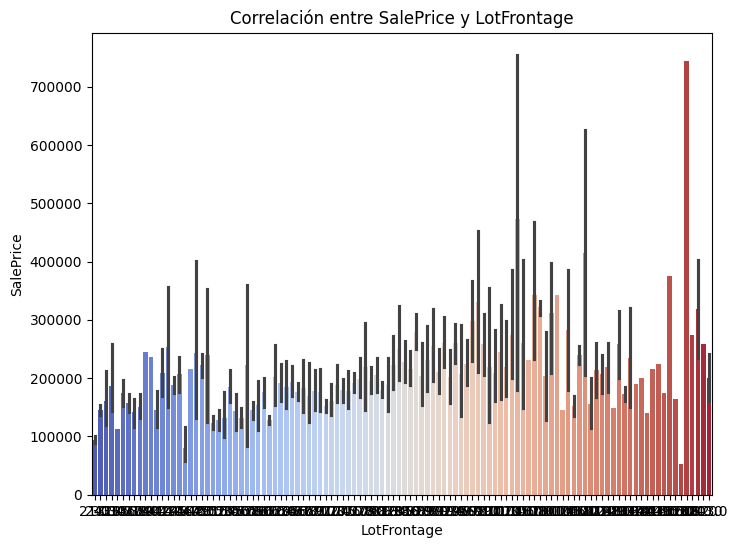

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['LotFrontage'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'LotFrontage'}")

plt.show()

<ipython-input-9-719be6aaa097>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['WoodDeckSF'], y=dataset_train['SalePrice'], palette="coolwarm")


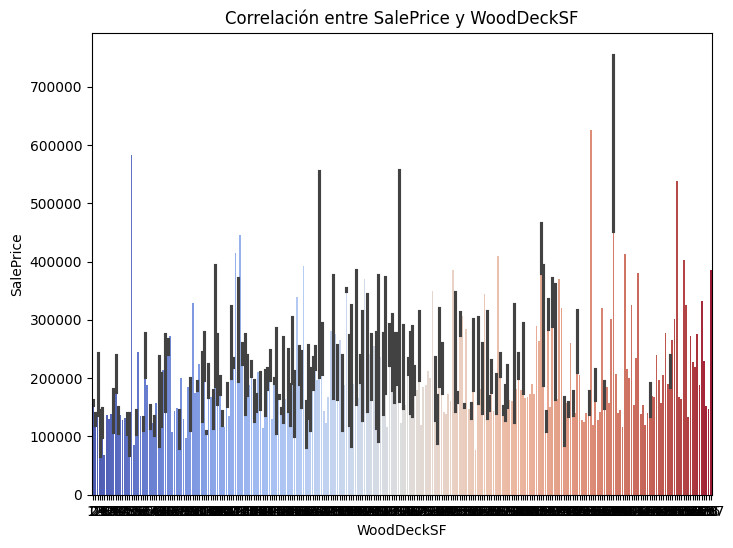

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['WoodDeckSF'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'WoodDeckSF'}")

plt.show()

<ipython-input-10-2eacdaba15ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['2ndFlrSF'], y=dataset_train['SalePrice'], palette="coolwarm")


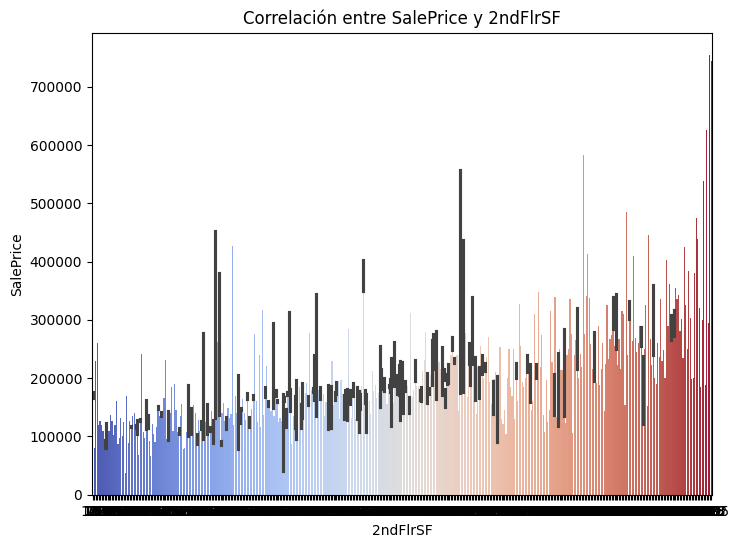

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['2ndFlrSF'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'2ndFlrSF'}")

plt.show()

<ipython-input-11-602bb8f8467a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['OpenPorchSF'], y=dataset_train['SalePrice'], palette="coolwarm")


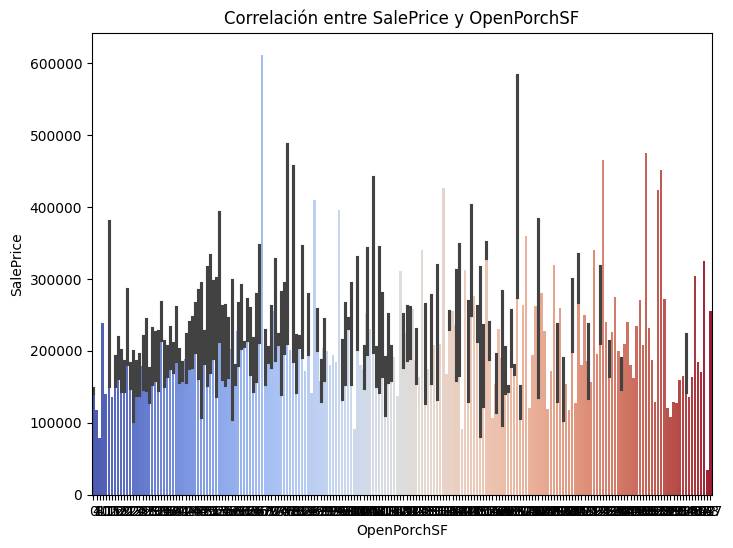

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['OpenPorchSF'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'OpenPorchSF'}")

plt.show()

<ipython-input-12-83540b640882>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['HalfBath'], y=dataset_train['SalePrice'], palette="coolwarm")


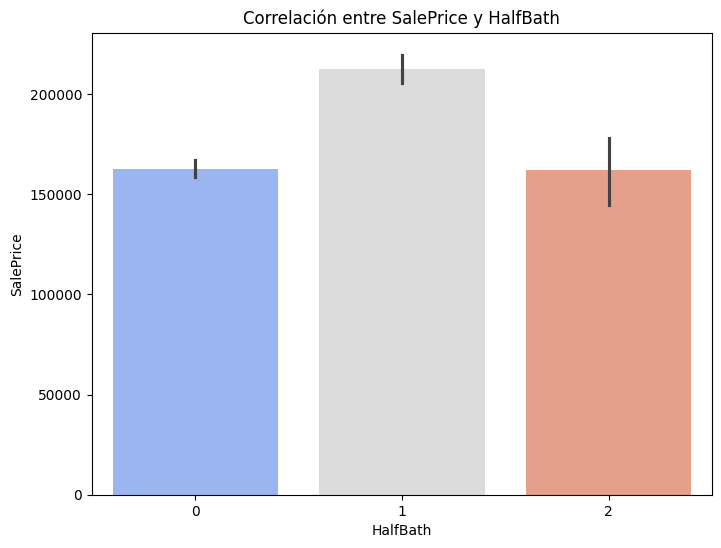

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['HalfBath'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'HalfBath'}")

plt.show()

<ipython-input-13-18499cf3207d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['LotArea'], y=dataset_train['SalePrice'], palette="coolwarm")


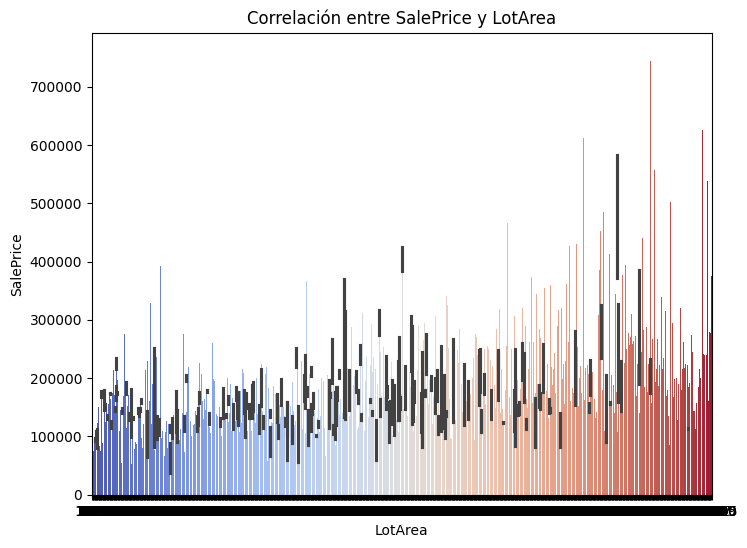

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['LotArea'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'LotArea'}")

plt.show()

<ipython-input-14-814cdb466a44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['BsmtFullBath'], y=dataset_train['SalePrice'], palette="coolwarm")


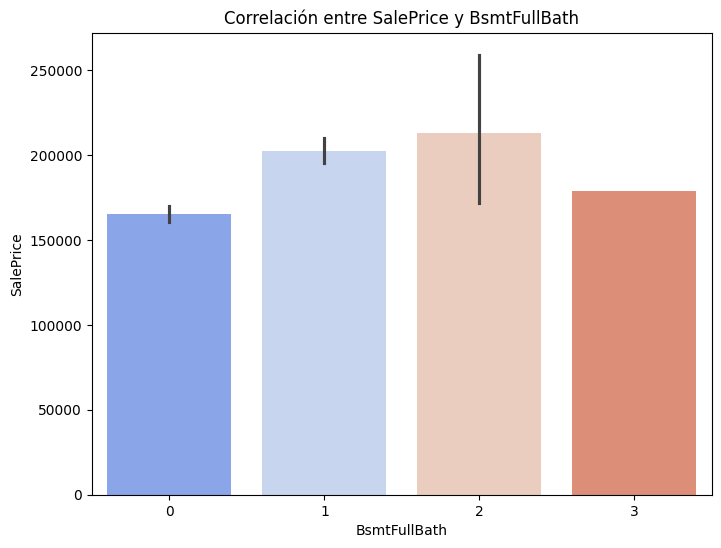

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['BsmtFullBath'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'BsmtFullBath'}")

plt.show()

<ipython-input-15-594568831afd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['BsmtUnfSF'], y=dataset_train['SalePrice'], palette="coolwarm")


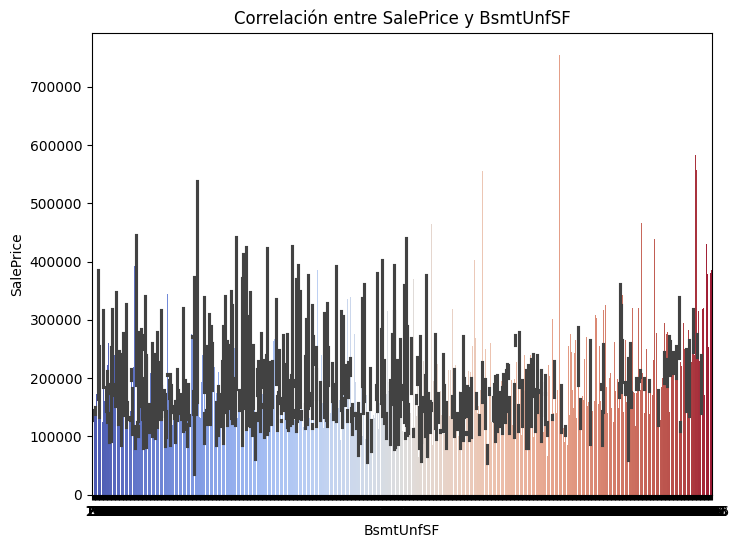

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['BsmtUnfSF'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'BsmtUnfSF'}")

plt.show()

<ipython-input-16-78ebc18e0fed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['BedroomAbvGr'], y=dataset_train['SalePrice'], palette="coolwarm")


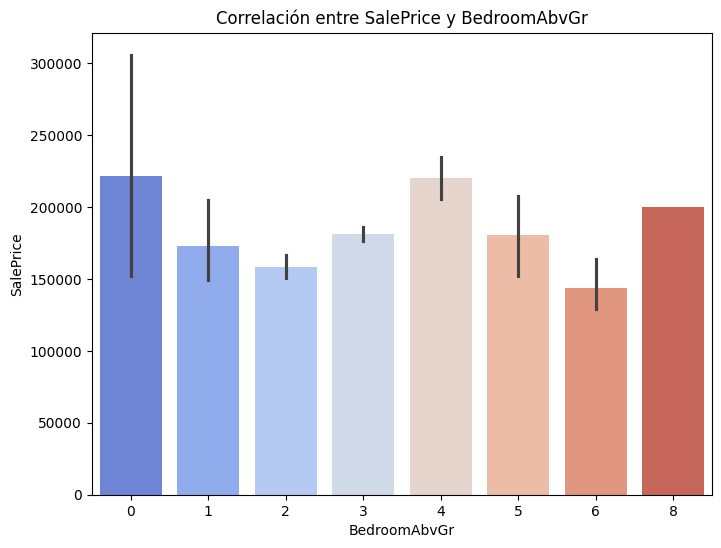

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['BedroomAbvGr'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'BedroomAbvGr'}")

plt.show()

<ipython-input-17-bd836a40e849>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['ScreenPorch'], y=dataset_train['SalePrice'], palette="coolwarm")


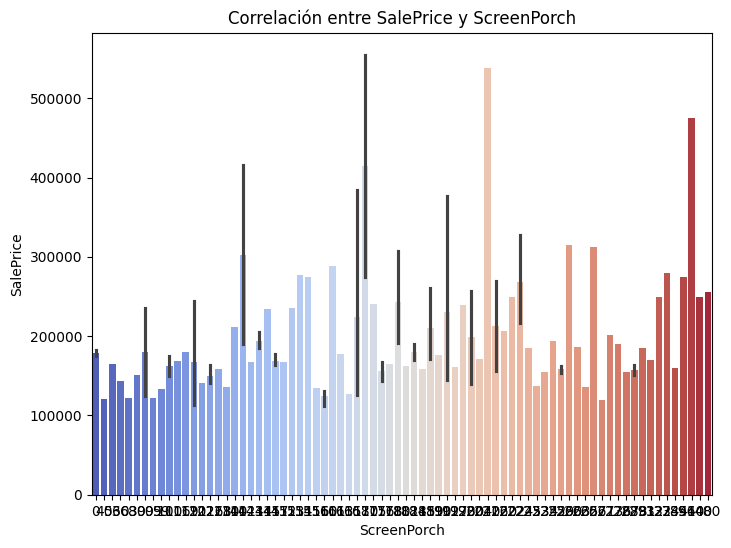

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['ScreenPorch'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'ScreenPorch'}")

plt.show()

<ipython-input-18-09241ec59e5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['PoolArea'], y=dataset_train['SalePrice'], palette="coolwarm")


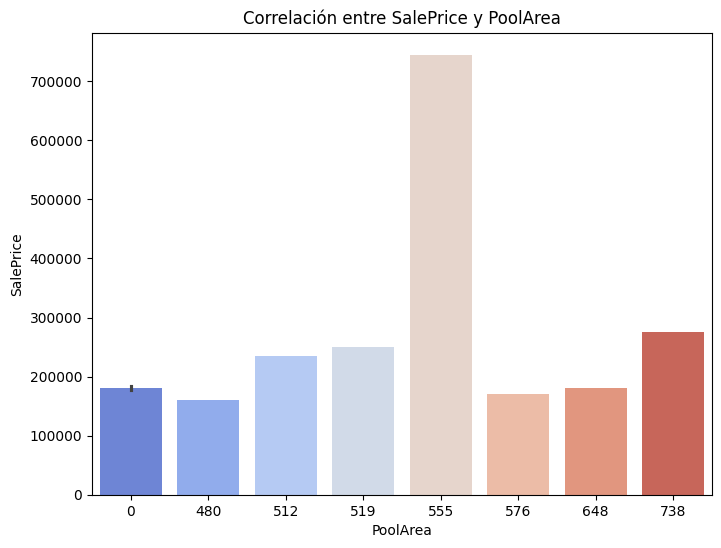

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['PoolArea'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'PoolArea'}")

plt.show()

<ipython-input-19-c7dbbc17b6a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['MoSold'], y=dataset_train['SalePrice'], palette="coolwarm")


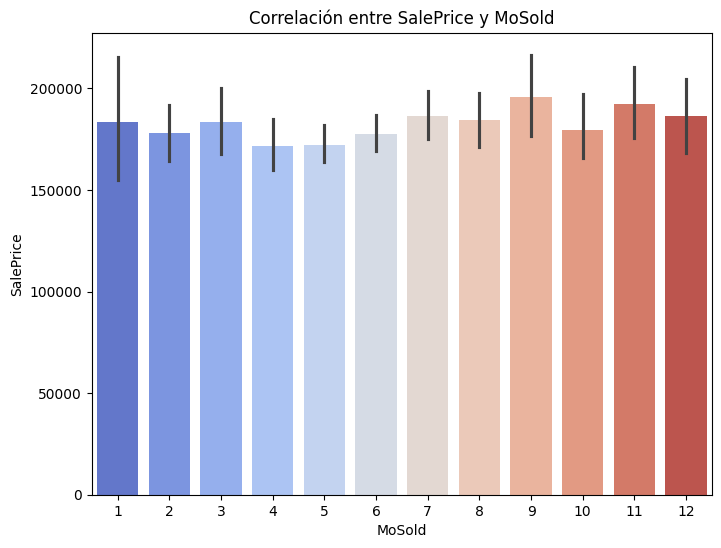

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['MoSold'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'MoSold'}")

plt.show()

<ipython-input-20-7cd4acc57155>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_train['3SsnPorch'], y=dataset_train['SalePrice'], palette="coolwarm")


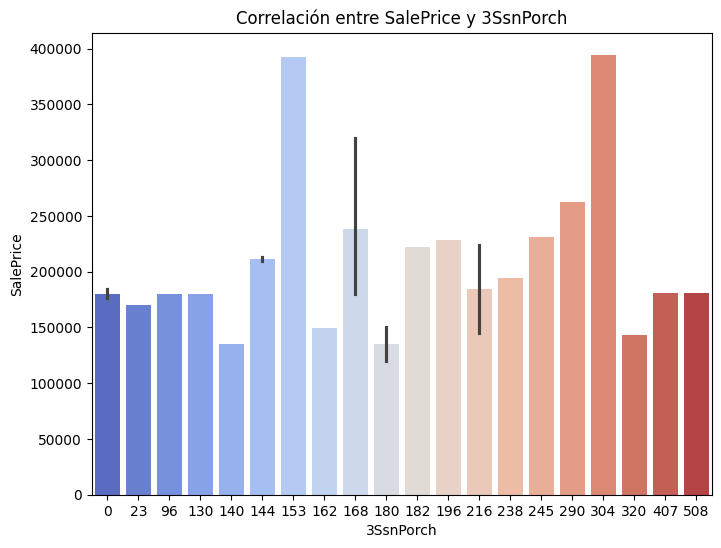

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset_train['3SsnPorch'], y=dataset_train['SalePrice'], palette="coolwarm")

plt.ylabel("SalePrice")
plt.title(f"Correlación entre {'SalePrice'} y {'3SsnPorch'}")

plt.show()

## Limpieza del dataset

Seleccionamos las columnas que tienen correlacion mayor a 0 y las elegimos como variables predictoras

In [ ]:
dataset_test_refin = dataset_test[['Id', 'OverallQual',  'GrLivArea',    'GarageCars',   'GarageArea',   'TotalBsmtSF',  '1stFlrSF',     'FullBath',     'TotRmsAbvGrd', 'YearBuilt',
                                   'YearRemodAdd', 'GarageYrBlt',  'MasVnrArea',   'Fireplaces',   'FireplaceQu',  'BsmtFinSF1']]
dataset_train_refin = dataset_train[['Id', 'OverallQual',  'GrLivArea',    'GarageCars',   'GarageArea',   'TotalBsmtSF',  '1stFlrSF',     'FullBath',     'TotRmsAbvGrd', 'YearBuilt',
                                   'YearRemodAdd', 'GarageYrBlt',  'MasVnrArea',   'Fireplaces',   'FireplaceQu',  'BsmtFinSF1','SalePrice']]

### imputacion de los registros nan con la media de cada columna


In [ ]:
display(dataset_train_refin)

Id  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        1            7       1710           2         548          856   
1        2            6       1262           2         460         1262   
2        3            7       1786           2         608          920   
3        4            7       1717           3         642          756   
4        5            8       2198           3         836         1145   
...    ...          ...        ...         ...         ...          ...   
1455  1456            6       1647           2         460          953   
1456  1457            6       2073           2         500         1542   
1457  1458            7       2340           1         252         1152   
1458  1459            5       1078           1         240         1078   
1459  1460            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0          856         2             8       2003          2003       2003.0   
1         1262         2             6       1976          1976       1976.0   
2          920         2             6       2001          2002       2001.0   
3          961         1             7       1915          1970       1998.0   
4         1145         2             9       2000          2000       2000.0   
...        ...       ...           ...        ...           ...          ...   
1455       953         2             7       1999          2000       1999.0   
1456      2073         2             7       1978          1988       1978.0   
1457      1188         2             9       1941          2006       1941.0   
1458      1078         1             5       1950          1996       1950.0   
1459      1256         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  SalePrice  
0          196.0           0            1         706     208500  
1            0.0           1            2         978     181500  
2          162.0           1            2         486     223500  
3            0.0           1            3         216     140000  
4          350.0           1            2         655     250000  
...          ...         ...          ...         ...        ...  
1455         0.0           1            2           0     175000  
1456       119.0           2            2         790     210000  
1457         0.0           2            3         275     266500  
1458         0.0           0            1          49     142125  
1459         0.0           0            1         830     147500  

[1460 rows x 17 columns]

In [ ]:
display(dataset_test_refin)

Id  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     1461            5        896         1.0       730.0        882.0   
1     1462            6       1329         1.0       312.0       1329.0   
2     1463            5       1629         2.0       482.0        928.0   
3     1464            6       1604         2.0       470.0        926.0   
4     1465            8       1280         2.0       506.0       1280.0   
...    ...          ...        ...         ...         ...          ...   
1454  2915            4       1092         0.0         0.0        546.0   
1455  2916            4       1092         1.0       286.0        546.0   
1456  2917            5       1224         2.0       576.0       1224.0   
1457  2918            5        970         0.0         0.0        912.0   
1458  2919            7       2000         3.0       650.0        996.0   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0          896         1             5       1961          1961       1961.0   
1         1329         1             6       1958          1958       1958.0   
2          928         2             6       1997          1998       1997.0   
3          926         2             7       1998          1998       1998.0   
4         1280         2             5       1992          1992       1992.0   
...        ...       ...           ...        ...           ...          ...   
1454       546         1             5       1970          1970          NaN   
1455       546         1             6       1970          1970       1970.0   
1456      1224         1             7       1960          1996       1960.0   
1457       970         1             6       1992          1992          NaN   
1458       996         2             9       1993          1994       1993.0   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  
0            0.0           0            1       468.0  
1          108.0           0            1       923.0  
2            0.0           1            2       791.0  
3           20.0           1            3       602.0  
4            0.0           0            1       263.0  
...          ...         ...          ...         ...  
1454         0.0           0            1         0.0  
1455         0.0           0            1       252.0  
1456         0.0           1            2      1224.0  
1457         0.0           0            1       337.0  
1458        94.0           1            2       758.0  

[1459 rows x 16 columns]

In [ ]:
dataset_test_refin.dtypes

Id                int64
OverallQual       int64
GrLivArea         int64
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt     float64
MasVnrArea      float64
Fireplaces        int64
FireplaceQu       int64
BsmtFinSF1      float64
dtype: object

In [ ]:
display(dataset_train_refin)

Id  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        1            7       1710           2         548          856   
1        2            6       1262           2         460         1262   
2        3            7       1786           2         608          920   
3        4            7       1717           3         642          756   
4        5            8       2198           3         836         1145   
...    ...          ...        ...         ...         ...          ...   
1455  1456            6       1647           2         460          953   
1456  1457            6       2073           2         500         1542   
1457  1458            7       2340           1         252         1152   
1458  1459            5       1078           1         240         1078   
1459  1460            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0          856         2             8       2003          2003       2003.0   
1         1262         2             6       1976          1976       1976.0   
2          920         2             6       2001          2002       2001.0   
3          961         1             7       1915          1970       1998.0   
4         1145         2             9       2000          2000       2000.0   
...        ...       ...           ...        ...           ...          ...   
1455       953         2             7       1999          2000       1999.0   
1456      2073         2             7       1978          1988       1978.0   
1457      1188         2             9       1941          2006       1941.0   
1458      1078         1             5       1950          1996       1950.0   
1459      1256         1             6       1965          1965       1965.0   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  SalePrice  
0          196.0           0            1         706     208500  
1            0.0           1            2         978     181500  
2          162.0           1            2         486     223500  
3            0.0           1            3         216     140000  
4          350.0           1            2         655     250000  
...          ...         ...          ...         ...        ...  
1455         0.0           1            2           0     175000  
1456       119.0           2            2         790     210000  
1457         0.0           2            3         275     266500  
1458         0.0           0            1          49     142125  
1459         0.0           0            1         830     147500  

[1460 rows x 17 columns]

#### Revision de valores nan

In [ ]:
columns_with_nan_test = dataset_test_refin.isna().any()
print(columns_with_nan_test)

Id              False
OverallQual     False
GrLivArea       False
GarageCars       True
GarageArea       True
TotalBsmtSF      True
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt      True
MasVnrArea       True
Fireplaces      False
FireplaceQu     False
BsmtFinSF1       True
dtype: bool


In [ ]:
columns_with_nan_train = dataset_train_refin.isna().any()
print(columns_with_nan_train)

Id              False
OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt      True
MasVnrArea       True
Fireplaces      False
FireplaceQu     False
BsmtFinSF1      False
SalePrice       False
dtype: bool


#### imputacion de los nan por la media

#### Imputacion del dataset de prueba

In [ ]:
# Calcular la media de cada columna
media_por_columna = dataset_test_refin.mean()

# Reemplazar los valores nulos o NaN en cada columna por la media correspondiente
for columna in dataset_test_refin.columns:
    media_columna = media_por_columna[columna]
    dataset_test_refin[columna].fillna(media_columna, inplace=True)


<ipython-input-426-80f858806829>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test_refin[columna].fillna(media_columna, inplace=True)


In [ ]:
columns_with_nan_test = dataset_test_refin.isna().any()
print(columns_with_nan_test)

Id              False
OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt     False
MasVnrArea      False
Fireplaces      False
FireplaceQu     False
BsmtFinSF1      False
dtype: bool


#### Imputacion del dataset de entrenamiento

In [ ]:
# Calcular la media de cada columna
media_por_columna = dataset_train_refin.mean()

# Reemplazar los valores nulos o NaN en cada columna por la media correspondiente
for columna in dataset_train_refin.columns:
    media_columna = media_por_columna[columna]
    dataset_train_refin[columna].fillna(media_columna, inplace=True)


<ipython-input-428-b612212bb35e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train_refin[columna].fillna(media_columna, inplace=True)


In [ ]:
columns_with_nan_train = dataset_train_refin.isna().any()
print(columns_with_nan_train)

Id              False
OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt     False
MasVnrArea      False
Fireplaces      False
FireplaceQu     False
BsmtFinSF1      False
SalePrice       False
dtype: bool


## Exploración de valores atipicos

### Exploracion dataset de prueba

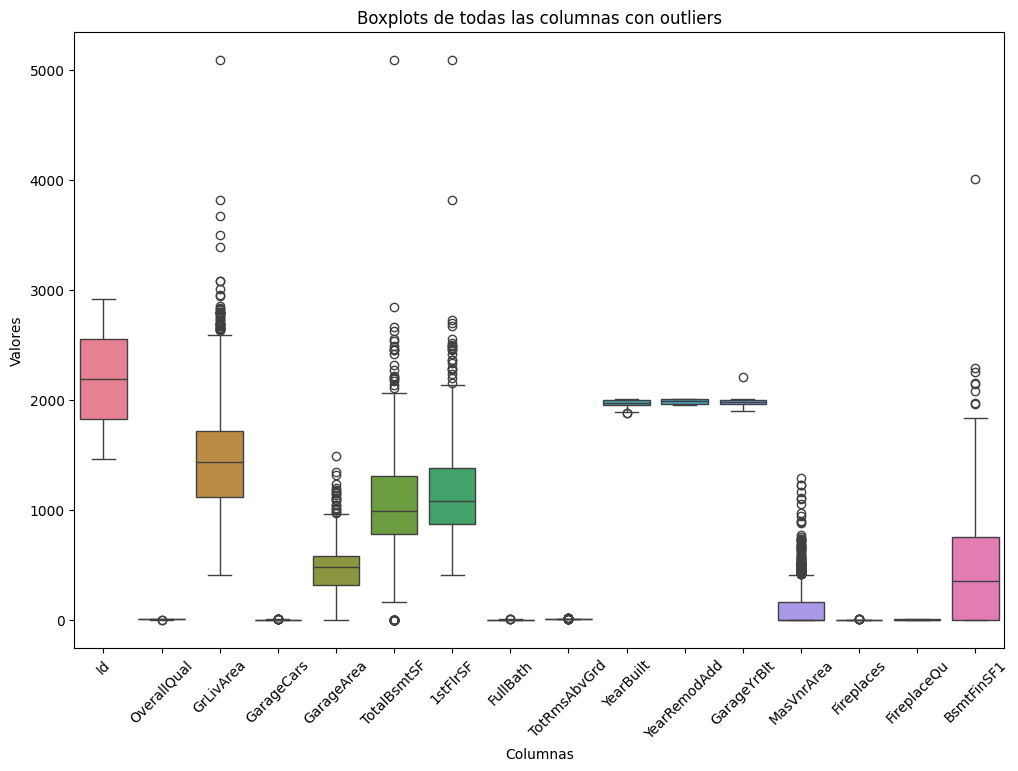

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar boxplots para cada columna en el DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset_test_refin)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.title('Boxplots de todas las columnas con outliers')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()

### Tratamiento de outliers del dataset de prueba

In [ ]:
def process_outliers(dataset, exclude_columns=[]):
    columns_to_process = [col for col in dataset.columns if col not in exclude_columns]

    for columna in columns_to_process:
        # Calculando estadísticas descriptivas para la columna
        columna_stats = dataset[columna].describe()
        print(columna_stats)

        # Calculando el rango intercuartílico (IQR)
        columna_IQR = columna_stats['75%'] - columna_stats['25%']
        print("IQR de  '" + columna + "':")
        print(columna_IQR)

        # Calculando los límites superior e inferior para identificar valores atípicos
        columna_limit_inf = columna_stats['25%'] - 1.5 * columna_IQR
        columna_limit_sup = columna_stats['75%'] + 1.5 * columna_IQR
        print("Limite inferior de  '" + columna + "':")
        print(columna_limit_inf)
        print("Limite superior de  '" + columna + "':")
        print(columna_limit_sup)

        # Identificando los valores atípicos basados en los límites superior e inferior
        columna_outliers = dataset[(dataset[columna] < columna_limit_inf) | (dataset[columna] > columna_limit_sup)]
        print("Outliers identificados para la columna '" + columna + "':")
        print(columna_outliers[columna])


        # # Reemplazando valores atípicos por la media de esa columna
        # columna_media = dataset[columna].mean()
        # dataset.loc[(dataset[columna] < columna_limit_inf) | (dataset[columna] > columna_limit_sup), columna] = columna_media
        # Calculando la media sin considerar los outliers
        columna_media_sin_outliers = dataset[(dataset[columna] >= columna_limit_inf) & (dataset[columna] <= columna_limit_sup)][columna].mean()

        # Reemplazando valores atípicos por la media sin considerar los outliers
        dataset.loc[(dataset[columna] < columna_limit_inf) | (dataset[columna] > columna_limit_sup), columna] = columna_media_sin_outliers

    return dataset

In [ ]:
dataset_test_procesado = process_outliers(dataset_test_refin, 'Id')

count    1459.000000
mean        6.078821
std         1.436812
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
IQR de  'OverallQual':
2.0
Limite inferior de  'OverallQual':
2.0
Limite superior de  'OverallQual':
10.0
Outliers identificados para la columna 'OverallQual':
756     1
1444    1
Name: OverallQual, dtype: int64
count    1459.000000
mean     1486.045922
std       485.566099
min       407.000000
25%      1117.500000
50%      1432.000000
75%      1721.000000
max      5095.000000
Name: GrLivArea, dtype: float64
IQR de  'GrLivArea':
603.5
Limite inferior de  'GrLivArea':
212.25
Limite superior de  'GrLivArea':
2626.25
Outliers identificados para la columna 'GrLivArea':
19      2696
133     2650
179     2673
200     2772
201     2690
203     2674
237     2687
278     3005
287     2640
401     2787
402     2787
403     2787
495     2840
509     2748
510     2790
516     2649
517     2690
563  

### Validación de tratamiento de outliers

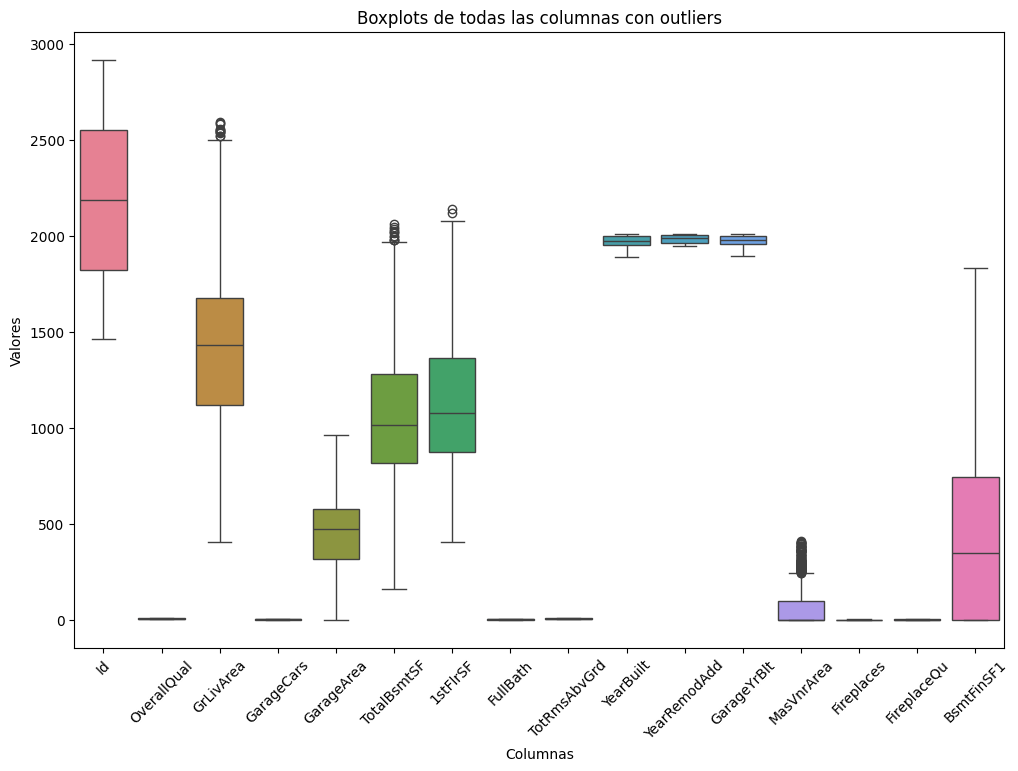

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset_test_procesado)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.title('Boxplots de todas las columnas con outliers')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()

### Exploracion dataset de entrenamiento

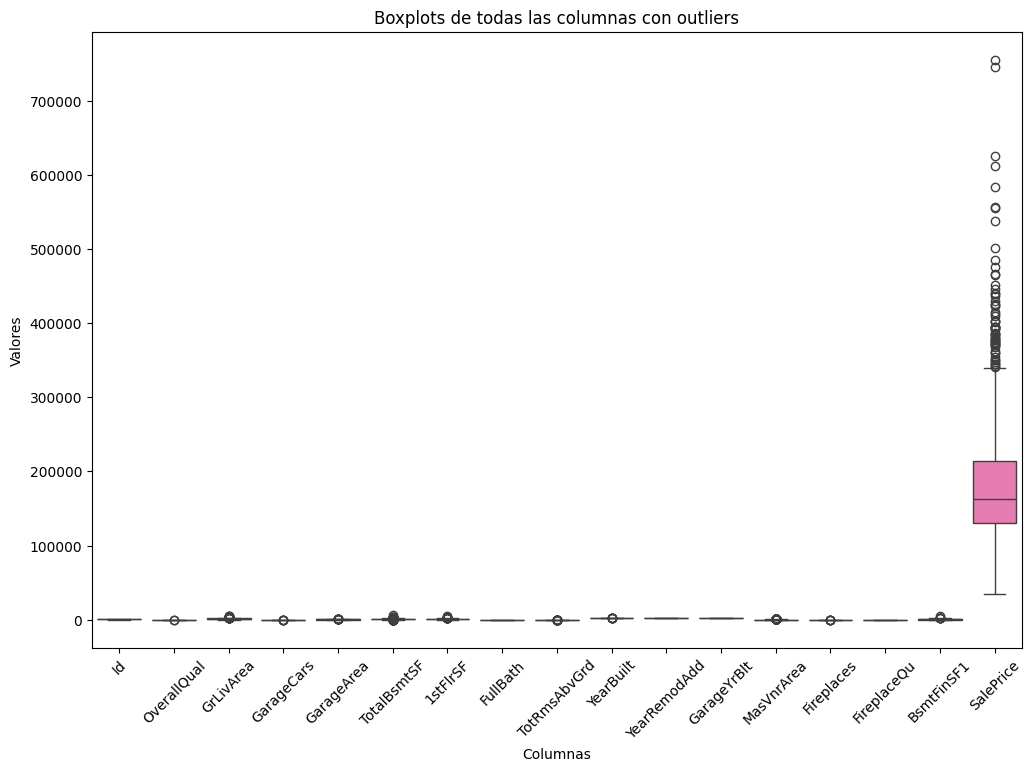

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Graficar boxplots para cada columna en el DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset_train_refin)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.title('Boxplots de todas las columnas con outliers')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()

### Tratamiento de outliers de dataset de entrenamiento

In [ ]:
dataset_train_procesado = process_outliers(dataset_train_refin, ['Id', 'SalePrice'])

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
IQR de  'OverallQual':
2.0
Limite inferior de  'OverallQual':
2.0
Limite superior de  'OverallQual':
10.0
Outliers identificados para la columna 'OverallQual':
375    1
533    1
Name: OverallQual, dtype: int64
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
IQR de  'GrLivArea':
647.25
Limite inferior de  'GrLivArea':
158.625
Limite superior de  'GrLivArea':
2747.625
Outliers identificados para la columna 'GrLivArea':
58      2945
118     3222
185     3608
197     3112
231     2794
304     3493
324     2978
496     3228
523     4676
583     2775
608     3194
635     3395
691     4316
769     3279
798     3140
803     2822
961     2872
1024

### Validación de tratamiento de outliers

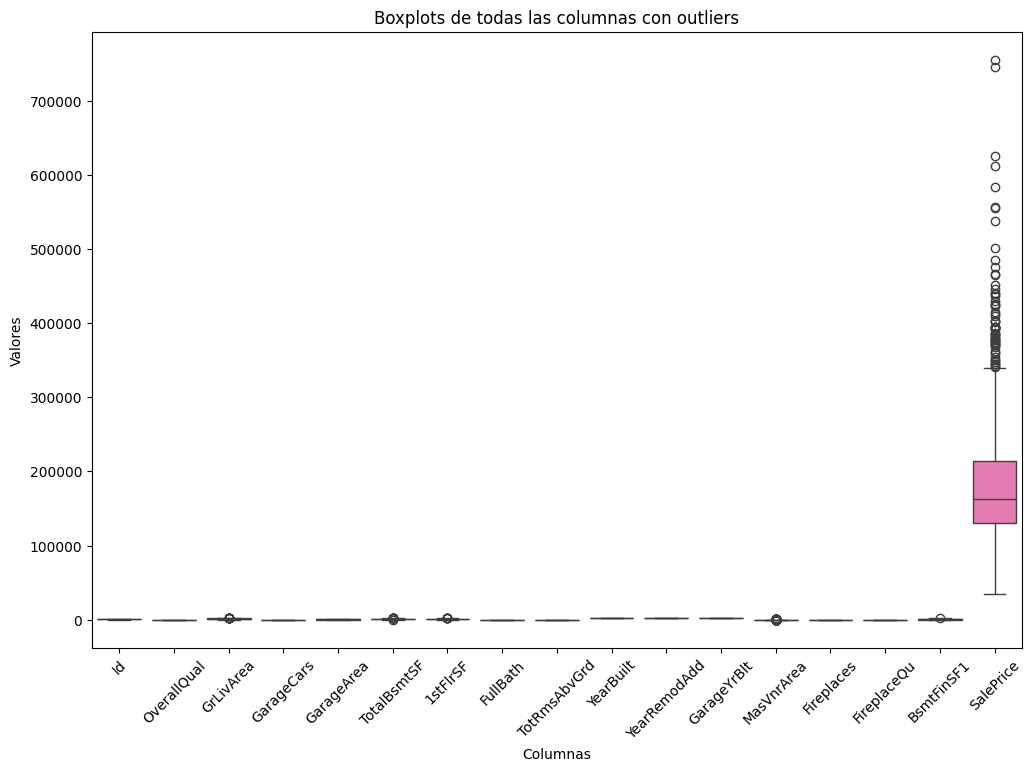

In [ ]:
# Graficar boxplots para cada columna en el DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset_train_procesado)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad
plt.title('Boxplots de todas las columnas con outliers')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.show()

## Revision de datasets para la entrenamiento y prediccion

In [ ]:
display(dataset_test_refin)

Id  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     1461          5.0      896.0         1.0       730.0        882.0   
1     1462          6.0     1329.0         1.0       312.0       1329.0   
2     1463          5.0     1629.0         2.0       482.0        928.0   
3     1464          6.0     1604.0         2.0       470.0        926.0   
4     1465          8.0     1280.0         2.0       506.0       1280.0   
...    ...          ...        ...         ...         ...          ...   
1454  2915          4.0     1092.0         0.0         0.0        546.0   
1455  2916          4.0     1092.0         1.0       286.0        546.0   
1456  2917          5.0     1224.0         2.0       576.0       1224.0   
1457  2918          5.0      970.0         0.0         0.0        912.0   
1458  2919          7.0     2000.0         3.0       650.0        996.0   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0        896.0       1.0           5.0     1961.0        1961.0       1961.0   
1       1329.0       1.0           6.0     1958.0        1958.0       1958.0   
2        928.0       2.0           6.0     1997.0        1998.0       1997.0   
3        926.0       2.0           7.0     1998.0        1998.0       1998.0   
4       1280.0       2.0           5.0     1992.0        1992.0       1992.0   
...        ...       ...           ...        ...           ...          ...   
1454     546.0       1.0           5.0     1970.0        1970.0          NaN   
1455     546.0       1.0           6.0     1970.0        1970.0       1970.0   
1456    1224.0       1.0           7.0     1960.0        1996.0       1960.0   
1457     970.0       1.0           6.0     1992.0        1992.0          NaN   
1458     996.0       2.0           9.0     1993.0        1994.0       1993.0   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  
0            0.0         0.0          1.0       468.0  
1          108.0         0.0          1.0       923.0  
2            0.0         1.0          2.0       791.0  
3           20.0         1.0          3.0       602.0  
4            0.0         0.0          1.0       263.0  
...          ...         ...          ...         ...  
1454         0.0         0.0          1.0         0.0  
1455         0.0         0.0          1.0       252.0  
1456         0.0         1.0          2.0      1224.0  
1457         0.0         0.0          1.0       337.0  
1458        94.0         1.0          2.0       758.0  

[1459 rows x 16 columns]

In [ ]:
display(dataset_train_refin)

Id  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        1          7.0     1710.0         2.0       548.0        856.0   
1        2          6.0     1262.0         2.0       460.0       1262.0   
2        3          7.0     1786.0         2.0       608.0        920.0   
3        4          7.0     1717.0         3.0       642.0        756.0   
4        5          8.0     2198.0         3.0       836.0       1145.0   
...    ...          ...        ...         ...         ...          ...   
1455  1456          6.0     1647.0         2.0       460.0        953.0   
1456  1457          6.0     2073.0         2.0       500.0       1542.0   
1457  1458          7.0     2340.0         1.0       252.0       1152.0   
1458  1459          5.0     1078.0         1.0       240.0       1078.0   
1459  1460          5.0     1256.0         1.0       276.0       1256.0   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0        856.0       2.0           8.0     2003.0        2003.0       2003.0   
1       1262.0       2.0           6.0     1976.0        1976.0       1976.0   
2        920.0       2.0           6.0     2001.0        2002.0       2001.0   
3        961.0       1.0           7.0     1915.0        1970.0       1998.0   
4       1145.0       2.0           9.0     2000.0        2000.0       2000.0   
...        ...       ...           ...        ...           ...          ...   
1455     953.0       2.0           7.0     1999.0        2000.0       1999.0   
1456    2073.0       2.0           7.0     1978.0        1988.0       1978.0   
1457    1188.0       2.0           9.0     1941.0        2006.0       1941.0   
1458    1078.0       1.0           5.0     1950.0        1996.0       1950.0   
1459    1256.0       1.0           6.0     1965.0        1965.0       1965.0   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  SalePrice  
0          196.0         0.0          1.0       706.0     208500  
1            0.0         1.0          2.0       978.0     181500  
2          162.0         1.0          2.0       486.0     223500  
3            0.0         1.0          3.0       216.0     140000  
4          350.0         1.0          2.0       655.0     250000  
...          ...         ...          ...         ...        ...  
1455         0.0         1.0          2.0         0.0     175000  
1456       119.0         2.0          2.0       790.0     210000  
1457         0.0         2.0          3.0       275.0     266500  
1458         0.0         0.0          1.0        49.0     142125  
1459         0.0         0.0          1.0       830.0     147500  

[1460 rows x 17 columns]

In [ ]:
columns_with_nan_test = dataset_test_refin.isna().any()
print(columns_with_nan_test)

Id              False
OverallQual     False
GrLivArea       False
GarageCars       True
GarageArea       True
TotalBsmtSF      True
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt      True
MasVnrArea       True
Fireplaces      False
FireplaceQu     False
BsmtFinSF1       True
dtype: bool


In [ ]:
# Calcular la media de cada columna
media_por_columna = dataset_test_procesado.mean()

# Reemplazar los valores nulos o NaN en cada columna por la media correspondiente
for columna in dataset_test_procesado.columns:
    media_columna = media_por_columna[columna]
    dataset_test_procesado[columna].fillna(media_columna, inplace=True)


<ipython-input-441-f076bd50284d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test_procesado[columna].fillna(media_columna, inplace=True)


In [ ]:
columns_with_nan_test = dataset_test_refin.isna().any()
print(columns_with_nan_test)

Id              False
OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt     False
MasVnrArea      False
Fireplaces      False
FireplaceQu     False
BsmtFinSF1      False
dtype: bool


In [ ]:
columns_with_nan_train = dataset_train_refin.isna().any()
print(columns_with_nan_train)

Id              False
OverallQual     False
GrLivArea       False
GarageCars      False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearBuilt       False
YearRemodAdd    False
GarageYrBlt     False
MasVnrArea      False
Fireplaces      False
FireplaceQu     False
BsmtFinSF1      False
SalePrice       False
dtype: bool


In [ ]:
# Calcular la media de cada columna
media_por_columna = dataset_train_procesado.mean()

# Reemplazar los valores nulos o NaN en cada columna por la media correspondiente
for columna in dataset_train_procesado.columns:
    media_columna = media_por_columna[columna]
    dataset_train_procesado[columna].fillna(media_columna, inplace=True)


<ipython-input-443-d8c34865d23b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train_procesado[columna].fillna(media_columna, inplace=True)


## Preparando el dataset para el entrenamiento y prediccion

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separar las características (X) y la variable dependiente (y)
X = dataset_train_procesado.drop(columns=['SalePrice', 'Id'])
y = dataset_train_procesado['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Usando Regresion lineal multiple

In [ ]:
from sklearn.metrics import mean_squared_error
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 1027170748.6866641


### Usando Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("Error cuadrático medio (Random Forest):", mse_random_forest)

Error cuadrático medio (Random Forest): 755502547.1260076


### Usando modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Error cuadrático medio (KNN):", mse_knn)

Error cuadrático medio (KNN): 1229944071.219012


### Usando Regresión de Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVR

# Creando y entrenando el modelo de regresión SVM
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# Haciendo predicciones
y_pred_svm = svm_regressor.predict(X_test)

# Calculando el error cuadrático medio
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Error cuadrático medio (SVM):", mse_svm)

Error cuadrático medio (SVM): 1147607469.6303232


### Usando Árboles de Decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Creando y entrenando el modelo de regresión de árbol de decisión
tree_regressor = DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(X_train, y_train)

# Haciendo predicciones
y_pred_tree = tree_regressor.predict(X_test)

# Calculando el error cuadrático medio
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Error cuadrático medio (Árbol de Decisión):", mse_tree)

Error cuadrático medio (Árbol de Decisión): 1101632228.6784108


#### Tratamiento Regresión Bayesian Ridge

In [ ]:
from sklearn.linear_model import BayesianRidge

# Creando y entrenando el modelo de regresión Bayesian Ridge
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(X_train, y_train)

# Haciendo predicciones
y_pred_bayesian = bayesian_regressor.predict(X_test)

# Calculando el error cuadrático medio
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
print("Error cuadrático medio (Bayesian Ridge):", mse_bayesian)

Error cuadrático medio (Bayesian Ridge): 1027492117.7924716


### Grafica la comparación entre los valores reales y predichos para cada modelo (Random Forest y KNN).








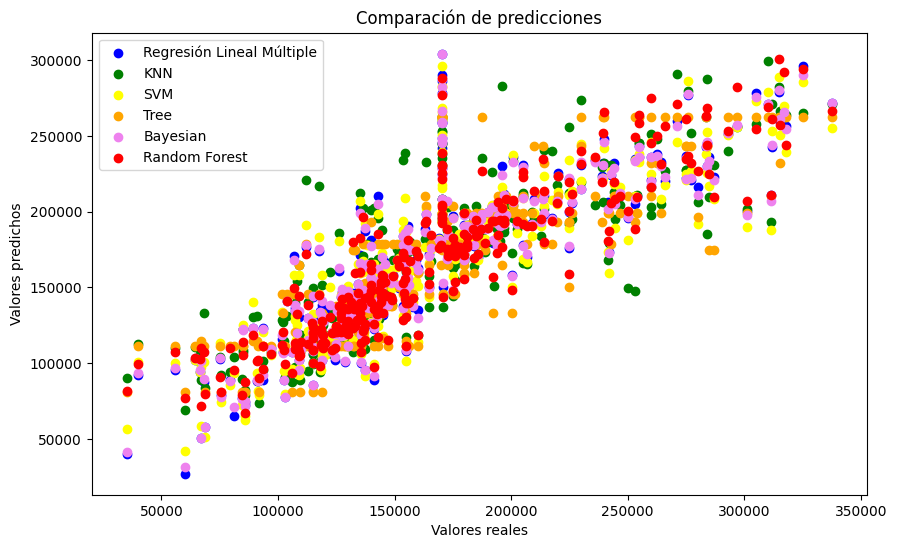

In [ ]:
# Graficar la comparación entre valores reales y predichos para los tres modelos
plt.figure(figsize=(10, 6))

# Regresión Lineal Múltiple
plt.scatter(y_test, y_pred, color='blue', label='Regresión Lineal Múltiple')

# KNN
plt.scatter(y_test, y_pred_knn, color='green', label='KNN')

# KNN
plt.scatter(y_test, y_pred_svm, color='yellow', label='SVM')

# KNN
plt.scatter(y_test, y_pred_tree, color='orange', label='Tree')

# KNN
plt.scatter(y_test, y_pred_bayesian, color='violet', label='Bayesian')

# Random Forest
plt.scatter(y_test, y_pred_random_forest, color='red', label='Random Forest')

plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación de predicciones")
plt.legend()
plt.show()

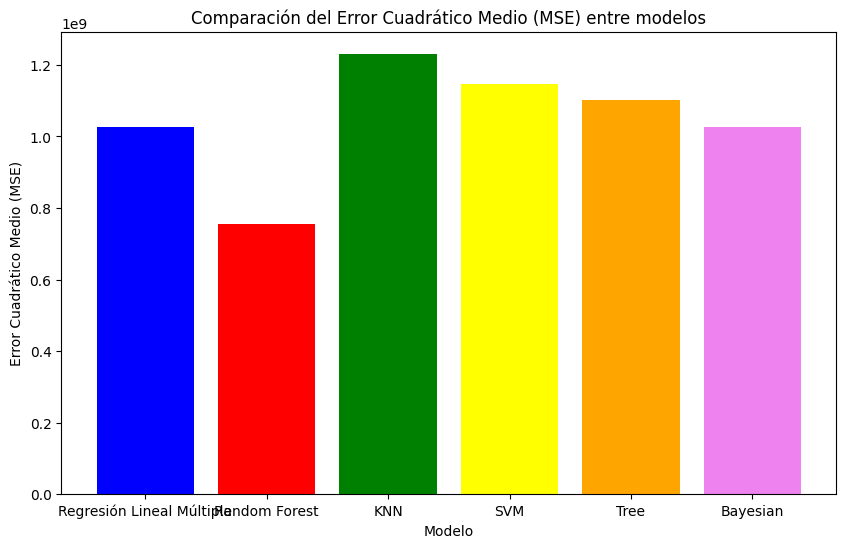

In [ ]:
# Calcular el MSE para cada modelo
mse_values = [mse, mse_random_forest, mse_knn, mse_svm, mse_tree, mse_bayesian]

# Nombres de los modelos
model_names = ['Regresión Lineal Múltiple', 'Random Forest', 'KNN', 'SVM', 'Tree', 'Bayesian']

# Graficar el MSE para cada modelo
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'red', 'green', 'yellow', 'orange', 'violet'])
plt.xlabel('Modelo')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación del Error Cuadrático Medio (MSE) entre modelos')
plt.show()


In [ ]:
print("Error cuadrático medio (MSE) - Regresión Lineal Múltiple:", mse)
print("Error cuadrático medio (MSE) - Random Forest:", mse_random_forest)
print("Error cuadrático medio (MSE) - KNN:", mse_knn)
print("Error cuadrático medio (MSE) - SVM:", mse_svm)
print("Error cuadrático medio (MSE) - Tree:", mse_tree)
print("Error cuadrático medio (MSE) - Bayesian:", mse_bayesian)


Error cuadrático medio (MSE) - Regresión Lineal Múltiple: 1027170748.6866641
Error cuadrático medio (MSE) - Random Forest: 755502547.1260076
Error cuadrático medio (MSE) - KNN: 1229944071.219012
Error cuadrático medio (MSE) - SVM: 1147607469.6303232
Error cuadrático medio (MSE) - Tree: 1101632228.6784108
Error cuadrático medio (MSE) - Bayesian: 1027492117.7924716


In [ ]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación (R^2) para cada modelo
r2_regression = r2_score(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
r2_knn = r2_score(y_test, y_pred_knn)
r2_svm = r2_score(y_test, y_pred_svm)
r2_tree = r2_score(y_test, y_pred_tree)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print("Coeficiente de determinación (R^2) - Regresión Lineal Múltiple:", r2_regression)
print("Coeficiente de determinación (R^2) - Random Forest:", r2_random_forest)
print("Coeficiente de determinación (R^2) - KNN:", r2_knn)
print("Coeficiente de determinación (R^2) - SVM:", r2_svm)
print("Coeficiente de determinación (R^2) - Tree:", r2_tree)
print("Coeficiente de determinación (R^2) - Bayesian:", r2_bayesian)


Coeficiente de determinación (R^2) - Regresión Lineal Múltiple: 0.7149792341941474
Coeficiente de determinación (R^2) - Random Forest: 0.7903621040363037
Coeficiente de determinación (R^2) - KNN: 0.65871341106098
Coeficiente de determinación (R^2) - SVM: 0.6815602856129132
Coeficiente de determinación (R^2) - Tree: 0.6943175593193318
Coeficiente de determinación (R^2) - Bayesian: 0.7148900602483738


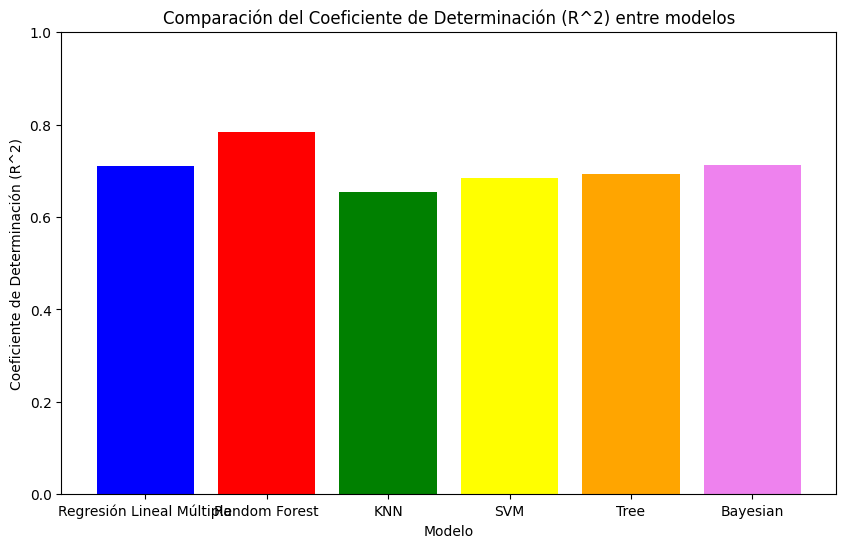

In [ ]:
# Coeficientes de determinación (R^2) para cada modelo
r2_values = [r2_regression, r2_random_forest, r2_knn, r2_svm, r2_tree, r2_bayesian]

# Nombres de los modelos
model_names = ['Regresión Lineal Múltiple', 'Random Forest', 'KNN', 'SVM', 'Tree', 'Bayesian']

# Graficar el R^2 para cada modelo
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color=['blue', 'red', 'green', 'yellow', 'orange', 'violet'])
plt.xlabel('Modelo')
plt.ylabel('Coeficiente de Determinación (R^2)')
plt.title('Comparación del Coeficiente de Determinación (R^2) entre modelos')
plt.ylim(0, 1)  # Establecer límites en el eje y entre 0 y 1
plt.show()


## Generando csv con el mejor modelo

In [ ]:
dataset_test_submission = dataset_test_procesado.drop(columns=['Id'])
dataset_test_submission

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0             5.0      896.0         1.0       730.0        882.0     896.0   
1             6.0     1329.0         1.0       312.0       1329.0    1329.0   
2             5.0     1629.0         2.0       482.0        928.0     928.0   
3             6.0     1604.0         2.0       470.0        926.0     926.0   
4             8.0     1280.0         2.0       506.0       1280.0    1280.0   
...           ...        ...         ...         ...          ...       ...   
1454          4.0     1092.0         0.0         0.0        546.0     546.0   
1455          4.0     1092.0         1.0       286.0        546.0     546.0   
1456          5.0     1224.0         2.0       576.0       1224.0    1224.0   
1457          5.0      970.0         0.0         0.0        912.0     970.0   
1458          7.0     2000.0         3.0       650.0        996.0     996.0   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0          1.0           5.0     1961.0        1961.0  1961.000000   
1          1.0           6.0     1958.0        1958.0  1958.000000   
2          2.0           6.0     1997.0        1998.0  1997.000000   
3          2.0           7.0     1998.0        1998.0  1998.000000   
4          2.0           5.0     1992.0        1992.0  1992.000000   
...        ...           ...        ...           ...          ...   
1454       1.0           5.0     1970.0        1970.0  1977.721217   
1455       1.0           6.0     1970.0        1970.0  1970.000000   
1456       1.0           7.0     1960.0        1996.0  1960.000000   
1457       1.0           6.0     1992.0        1992.0  1977.721217   
1458       2.0           9.0     1993.0        1994.0  1993.000000   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  LotFrontage  
0            0.0         0.0          1.0       468.0    80.000000  
1          108.0         0.0          1.0       923.0    81.000000  
2            0.0         1.0          2.0       791.0    74.000000  
3           20.0         1.0          3.0       602.0    78.000000  
4            0.0         0.0          1.0       263.0    43.000000  
...          ...         ...          ...         ...          ...  
1454         0.0         0.0          1.0         0.0    68.190244  
1455         0.0         0.0          1.0       252.0    68.190244  
1456         0.0         1.0          2.0      1224.0    68.190244  
1457         0.0         0.0          1.0       337.0    62.000000  
1458        94.0         1.0          2.0       758.0    74.000000  

[1459 rows x 16 columns]

In [ ]:
dataset_test_submission['SalePrice'] = random_forest_model.predict(dataset_test_submission)
dataset_test_submission

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0             5.0      896.0         1.0       730.0        882.0     896.0   
1             6.0     1329.0         1.0       312.0       1329.0    1329.0   
2             5.0     1629.0         2.0       482.0        928.0     928.0   
3             6.0     1604.0         2.0       470.0        926.0     926.0   
4             8.0     1280.0         2.0       506.0       1280.0    1280.0   
...           ...        ...         ...         ...          ...       ...   
1454          4.0     1092.0         0.0         0.0        546.0     546.0   
1455          4.0     1092.0         1.0       286.0        546.0     546.0   
1456          5.0     1224.0         2.0       576.0       1224.0    1224.0   
1457          5.0      970.0         0.0         0.0        912.0     970.0   
1458          7.0     2000.0         3.0       650.0        996.0     996.0   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0          1.0           5.0     1961.0        1961.0  1961.000000   
1          1.0           6.0     1958.0        1958.0  1958.000000   
2          2.0           6.0     1997.0        1998.0  1997.000000   
3          2.0           7.0     1998.0        1998.0  1998.000000   
4          2.0           5.0     1992.0        1992.0  1992.000000   
...        ...           ...        ...           ...          ...   
1454       1.0           5.0     1970.0        1970.0  1977.721217   
1455       1.0           6.0     1970.0        1970.0  1970.000000   
1456       1.0           7.0     1960.0        1996.0  1960.000000   
1457       1.0           6.0     1992.0        1992.0  1977.721217   
1458       2.0           9.0     1993.0        1994.0  1993.000000   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  LotFrontage  \
0            0.0         0.0          1.0       468.0    80.000000   
1          108.0         0.0          1.0       923.0    81.000000   
2            0.0         1.0          2.0       791.0    74.000000   
3           20.0         1.0          3.0       602.0    78.000000   
4            0.0         0.0          1.0       263.0    43.000000   
...          ...         ...          ...         ...          ...   
1454         0.0         0.0          1.0         0.0    68.190244   
1455         0.0         0.0          1.0       252.0    68.190244   
1456         0.0         1.0          2.0      1224.0    68.190244   
1457         0.0         0.0          1.0       337.0    62.000000   
1458        94.0         1.0          2.0       758.0    74.000000   

          SalePrice  
0     124686.000000  
1     153553.000000  
2     177415.870000  
3     187033.460000  
4     193459.482545  
...             ...  
1454   85478.000000  
1455   90504.000000  
1456  141378.980000  
1457  112088.000000  
1458  234775.650000  

[1459 rows x 17 columns]

In [ ]:
dataset_test_submission['Id'] = range(1461, 1461 + len(dataset_test_submission))
dataset_test_submission

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0             5.0      896.0         1.0       730.0        882.0     896.0   
1             6.0     1329.0         1.0       312.0       1329.0    1329.0   
2             5.0     1629.0         2.0       482.0        928.0     928.0   
3             6.0     1604.0         2.0       470.0        926.0     926.0   
4             8.0     1280.0         2.0       506.0       1280.0    1280.0   
...           ...        ...         ...         ...          ...       ...   
1454          4.0     1092.0         0.0         0.0        546.0     546.0   
1455          4.0     1092.0         1.0       286.0        546.0     546.0   
1456          5.0     1224.0         2.0       576.0       1224.0    1224.0   
1457          5.0      970.0         0.0         0.0        912.0     970.0   
1458          7.0     2000.0         3.0       650.0        996.0     996.0   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0          1.0           5.0     1961.0        1961.0  1961.000000   
1          1.0           6.0     1958.0        1958.0  1958.000000   
2          2.0           6.0     1997.0        1998.0  1997.000000   
3          2.0           7.0     1998.0        1998.0  1998.000000   
4          2.0           5.0     1992.0        1992.0  1992.000000   
...        ...           ...        ...           ...          ...   
1454       1.0           5.0     1970.0        1970.0  1977.721217   
1455       1.0           6.0     1970.0        1970.0  1970.000000   
1456       1.0           7.0     1960.0        1996.0  1960.000000   
1457       1.0           6.0     1992.0        1992.0  1977.721217   
1458       2.0           9.0     1993.0        1994.0  1993.000000   

      MasVnrArea  Fireplaces  FireplaceQu  BsmtFinSF1  LotFrontage  \
0            0.0         0.0          1.0       468.0    80.000000   
1          108.0         0.0          1.0       923.0    81.000000   
2            0.0         1.0          2.0       791.0    74.000000   
3           20.0         1.0          3.0       602.0    78.000000   
4            0.0         0.0          1.0       263.0    43.000000   
...          ...         ...          ...         ...          ...   
1454         0.0         0.0          1.0         0.0    68.190244   
1455         0.0         0.0          1.0       252.0    68.190244   
1456         0.0         1.0          2.0      1224.0    68.190244   
1457         0.0         0.0          1.0       337.0    62.000000   
1458        94.0         1.0          2.0       758.0    74.000000   

          SalePrice    Id  
0     124686.000000  1461  
1     153553.000000  1462  
2     177415.870000  1463  
3     187033.460000  1464  
4     193459.482545  1465  
...             ...   ...  
1454   85478.000000  2915  
1455   90504.000000  2916  
1456  141378.980000  2917  
1457  112088.000000  2918  
1458  234775.650000  2919  

[1459 rows x 18 columns]

In [ ]:

resultados_prediccion_rdf = dataset_test_submission[['Id', 'SalePrice']].to_csv('rdf_submission_prediction.csv', index=False)


In [ ]:
sample_submission_prediccion_rdf_df = pd.read_csv('rdf_submission_prediction.csv')

# Mostrar los primeros registros del DataFrame leído
print(sample_submission_prediccion_rdf_df.head())

     Id      SalePrice
0  1461  124686.000000
1  1462  153553.000000
2  1463  177415.870000
3  1464  187033.460000
4  1465  193459.482545


In [ ]:
len(sample_submission_prediccion_rdf_df)

1459